In [44]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt #bibliotecas para visualizações
import seaborn as sns

from datasetsforecast.hierarchical import HierarchicalData
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.methods import  BottomUp, TopDown, MiddleOut, MinTrace, ERM
from hierarchicalforecast.evaluation import HierarchicalEvaluation
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive
import pyarrow

from datetime import datetime

from sklearn.metrics import mean_squared_error as mse

C:\ProgramData\Anaconda3\lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [9]:
pd.set_option('display.width', 1000)

In [10]:
# reading the dataset using read_csv
df = pd.read_csv("tabela_ds_agrupada.csv", 
                 parse_dates=True, 
                 index_col="orderdate")
 
# displaying the first five rows of dataset
df.head()


total_qtd_product  unitprice_product productmodel_name  standardcost_product  listprice_product  daystomanufature_product product_line product_class product_style                       name_store countryregioncode
orderdate                                                                                                                                                                                                                        
2011-05-31                  3             5.1865       Cycling Cap                6.9223               8.99                         0    undefined     undefined     undefined           Outdoor Sporting Goods     United States
2011-05-31                 12             5.1865       Cycling Cap                6.9223               8.99                         0    undefined     undefined     undefined  Petroleum Products Distributors            others
2011-05-31                  8             5.1865       Cycling Cap                6.9223               8.99                         0    undefined     undefined     undefined          Quick Parts and Service            others
2011-05-31                  5             5.1865       Cycling Cap                6.9223               8.99                         0    undefined     undefined     undefined       Racing Supply Distributors            others
2011-05-31                  5             5.1865       Cycling Cap                6.9223               8.99                         0    undefined     undefined     undefined           Reliable Brake Systems     United States

In [11]:
print(df.head())

            total_qtd_product  unitprice_product productmodel_name  standardcost_product  listprice_product  daystomanufature_product product_line product_class product_style                       name_store countryregioncode
orderdate                                                                                                                                                                                                                        
2011-05-31                  3             5.1865       Cycling Cap                6.9223               8.99                         0    undefined     undefined     undefined           Outdoor Sporting Goods     United States
2011-05-31                 12             5.1865       Cycling Cap                6.9223               8.99                         0    undefined     undefined     undefined  Petroleum Products Distributors            others
2011-05-31                  8             5.1865       Cycling Cap                6.9223        

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22620 entries, 2011-05-31 to 2014-06-30
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_qtd_product         22620 non-null  int64  
 1   unitprice_product         22620 non-null  float64
 2   productmodel_name         22620 non-null  object 
 3   standardcost_product      22620 non-null  float64
 4   listprice_product         22620 non-null  float64
 5   daystomanufature_product  22620 non-null  int64  
 6   product_line              22620 non-null  object 
 7   product_class             22620 non-null  object 
 8   product_style             22620 non-null  object 
 9   name_store                22620 non-null  object 
 10  countryregioncode         22620 non-null  object 
 11  dayofweek                 22620 non-null  int32  
 12  quarter                   22620 non-null  int32  
 13  month                     22620 non-null  in

In [12]:
df.isna().sum()

total_qtd_product               0
unitprice_product               0
productmodel_name               0
standardcost_product            0
listprice_product               0
daystomanufature_product        0
product_line                    0
product_class                   0
product_style                   0
name_store                  13333
countryregioncode               0
dtype: int64

## os registros onde não há indicação de loja correspondem às compras foram feitas na modalidade online

In [13]:
df['name_store'] = df['name_store'].fillna('online')

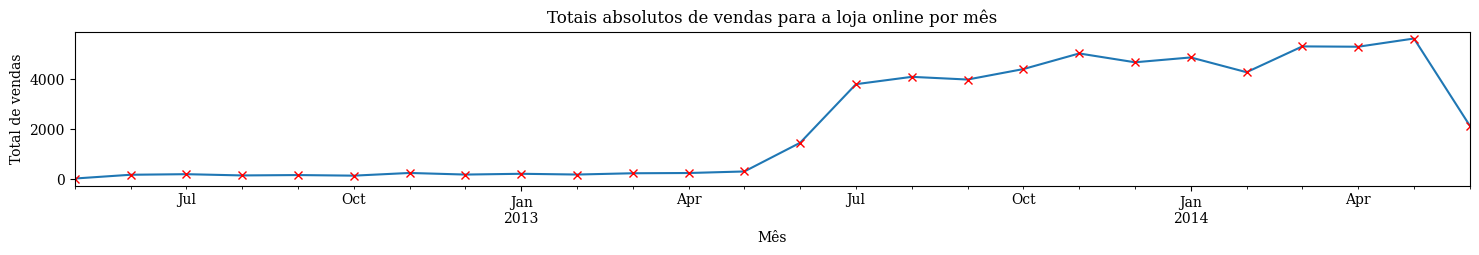

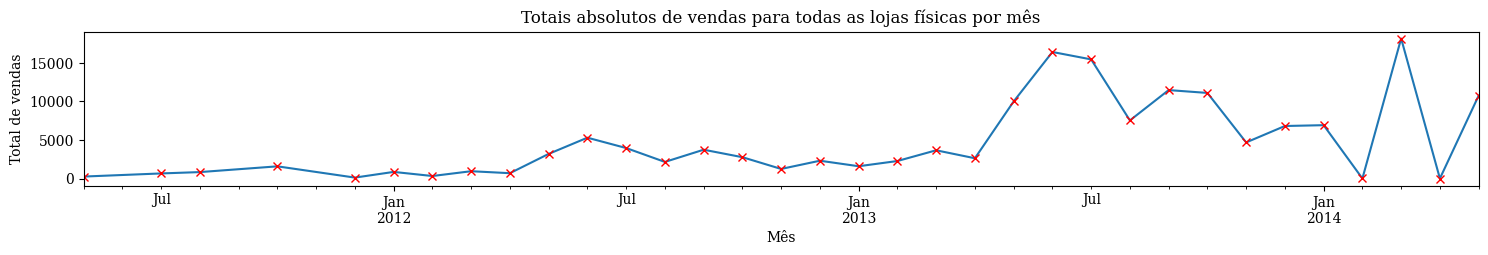

In [14]:
#copia o df original
df_aux = df.copy()
# Crie uma nova coluna 'ano-mês' no DataFrame
df_aux['ano_mes'] = df_aux.index.to_period('M')

# Filtra os dados para a loja 'online'
df_online = df_aux[df_aux['name_store'] == 'online']

# Filtra os dados para todas as outras lojas
df_outros = df_aux[df_aux['name_store'] != 'online']

# Agrupa os dados por 'ano-mês' e soma as vendas
df_total_online = df_online.groupby('ano_mes')['total_qtd_product'].sum()
df_total_outros = df_outros.groupby('ano_mes')['total_qtd_product'].sum()

# Cria o gráfico para a loja 'online'
df_total_online.plot(kind='line', figsize=(18,2))
df_total_online.plot(marker='x', linestyle='', color='red')
plt.title('Totais absolutos de vendas para a loja online por mês')
plt.xlabel('Mês')
plt.ylabel('Total de vendas')
plt.show()

# Cria o gráfico para todas as outras lojas
df_total_outros.plot(kind='line', figsize=(18,2))
df_total_outros.plot(marker='x', linestyle='', color='red')
plt.title('Totais absolutos de vendas para todas as lojas físicas por mês')
plt.xlabel('Mês')
plt.ylabel('Total de vendas')
plt.show()


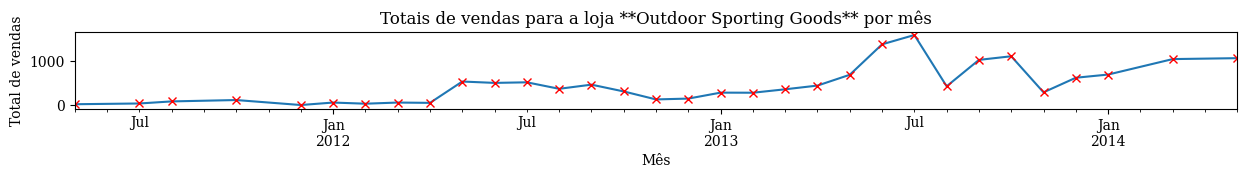

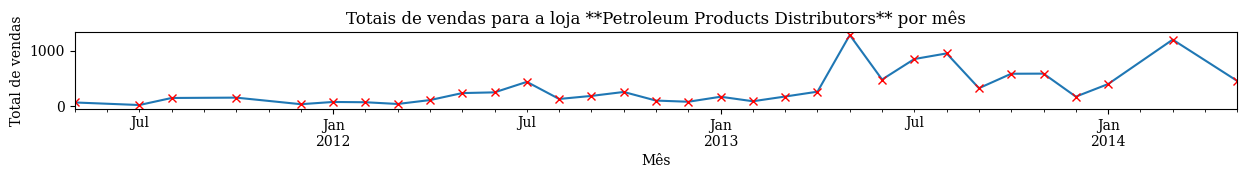

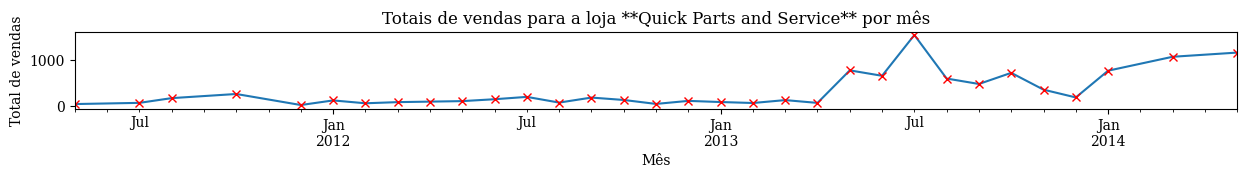

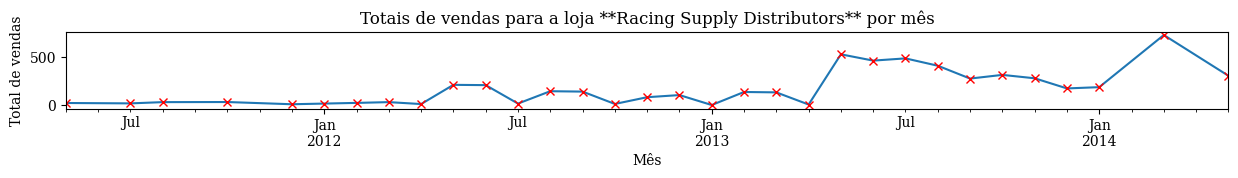

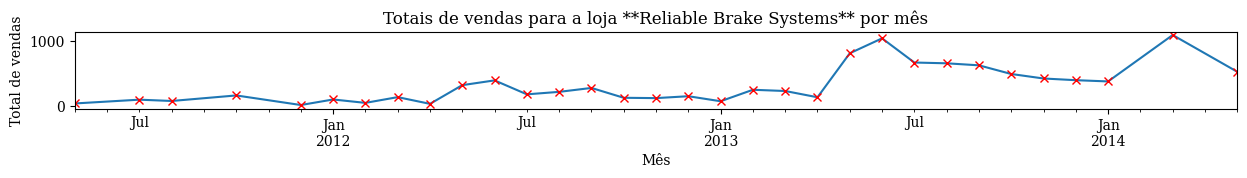

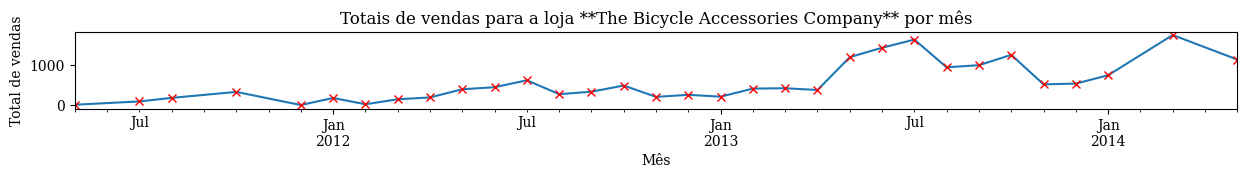

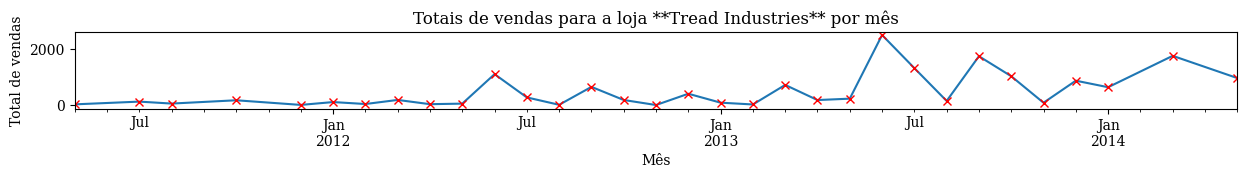

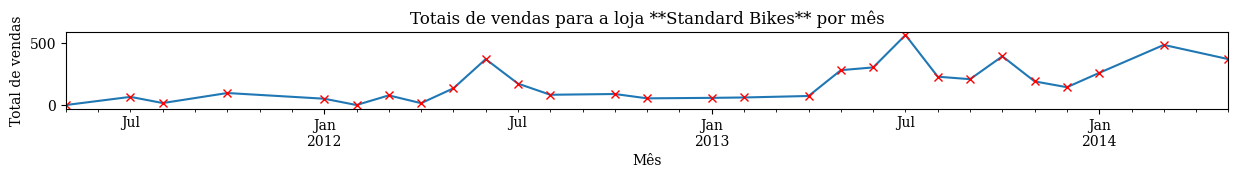

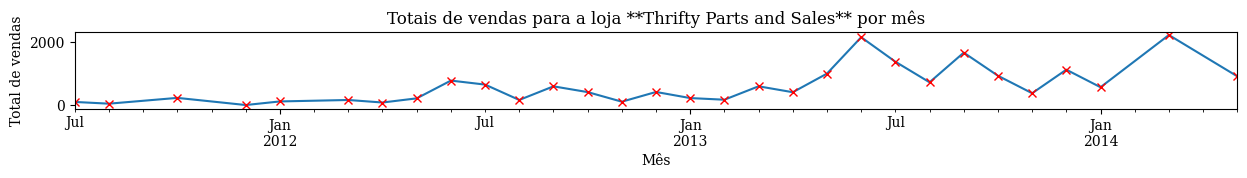

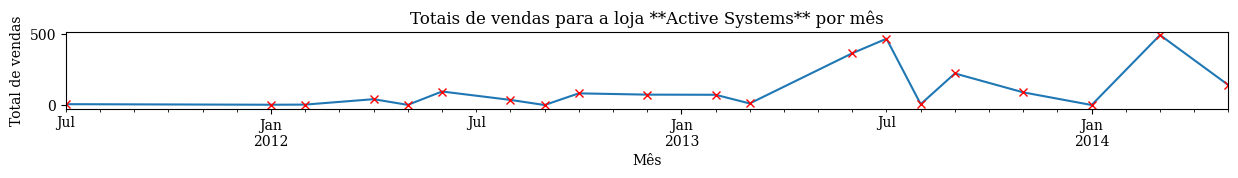

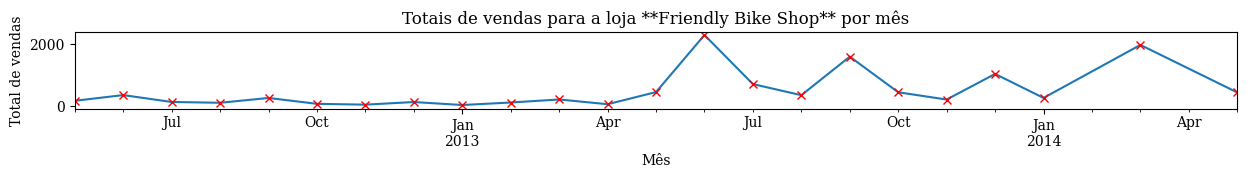

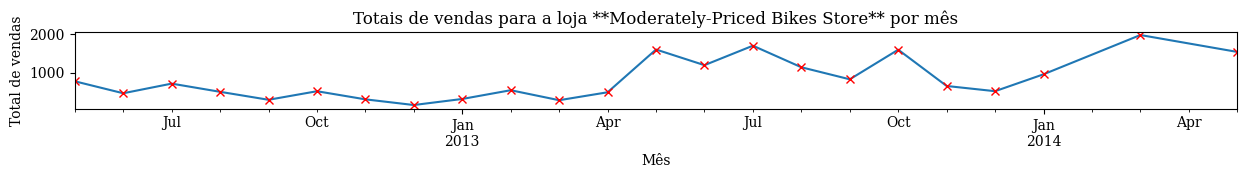

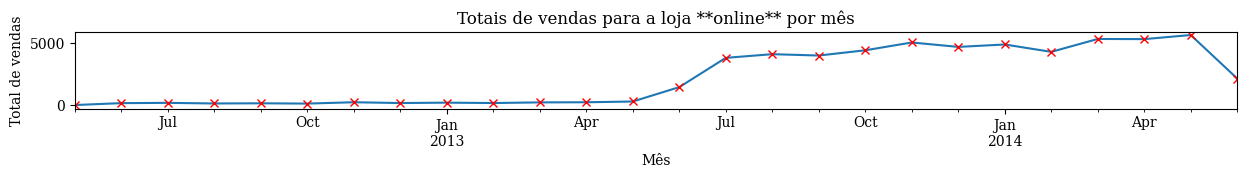

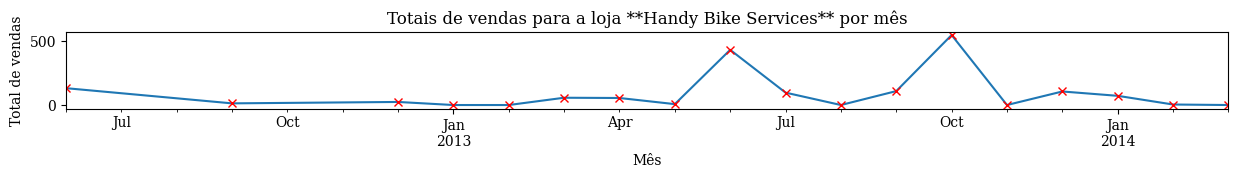

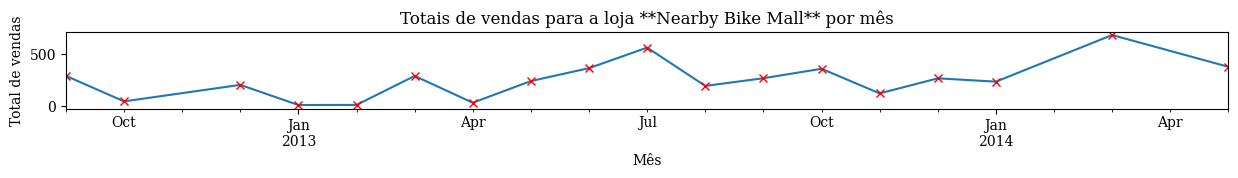

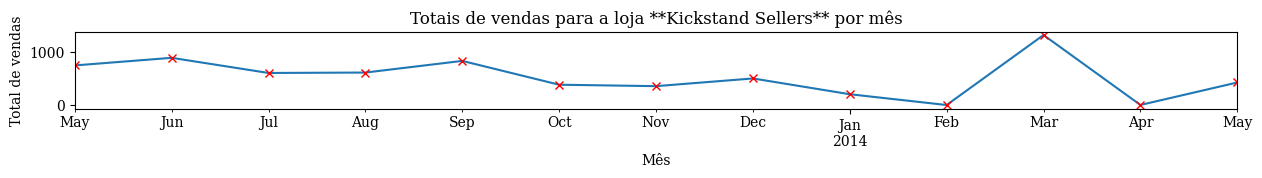

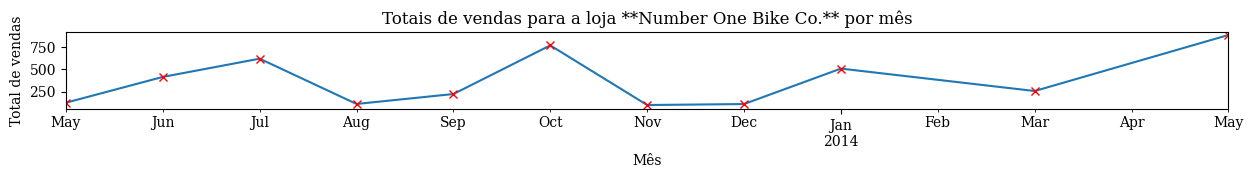

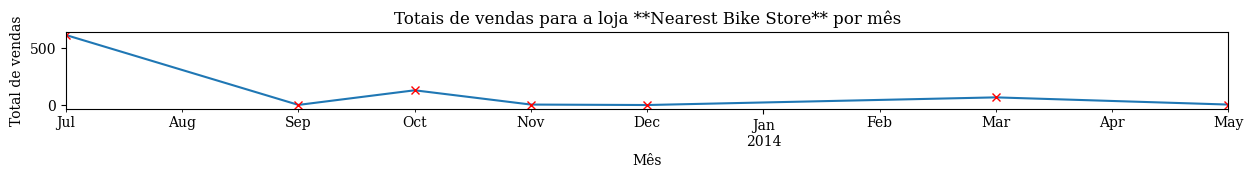

In [15]:
#copia o df original
df_aux = df.copy()
# Crie uma nova coluna 'ano-mês' no DataFrame
df_aux['ano_mes'] = df_aux.index.to_period('M')

# Obtenha a lista de todas as lojas únicas
lojas = df_aux['name_store'].unique()

# Para cada loja, crie um gráfico separado
for loja in lojas:
    # Filtra os dados para a loja atual
    df_loja = df_aux[df_aux['name_store'] == loja]
    
    # Agrupa os dados por 'ano-mês' e soma as vendas
    df_grouped = df_loja.groupby('ano_mes')['total_qtd_product'].sum()
    
    # Cria o gráfico
    df_grouped.plot(kind='line', figsize=(15,1))

    # Adiciona marcações com 'x' vermelho nos pontos de dados
    df_grouped.plot(marker='x', linestyle='', color='red')
    
    plt.title(f'Totais de vendas para a loja **{loja}** por mês')
    plt.xlabel('Mês')
    plt.ylabel('Total de vendas')
    plt.show()

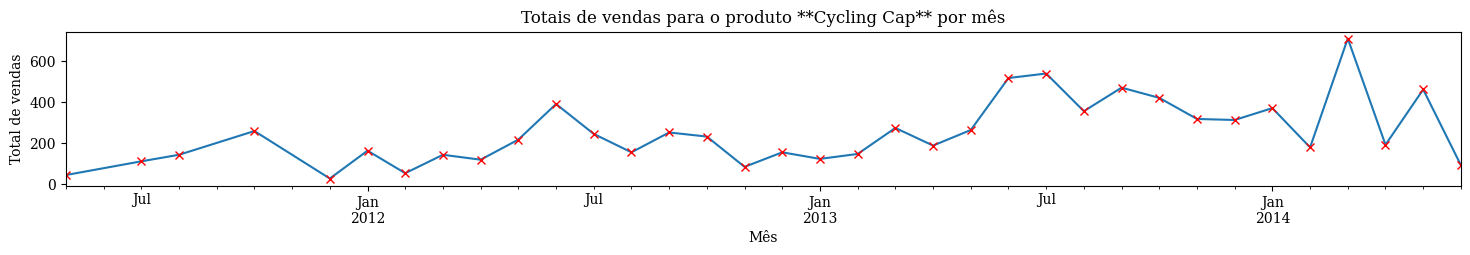

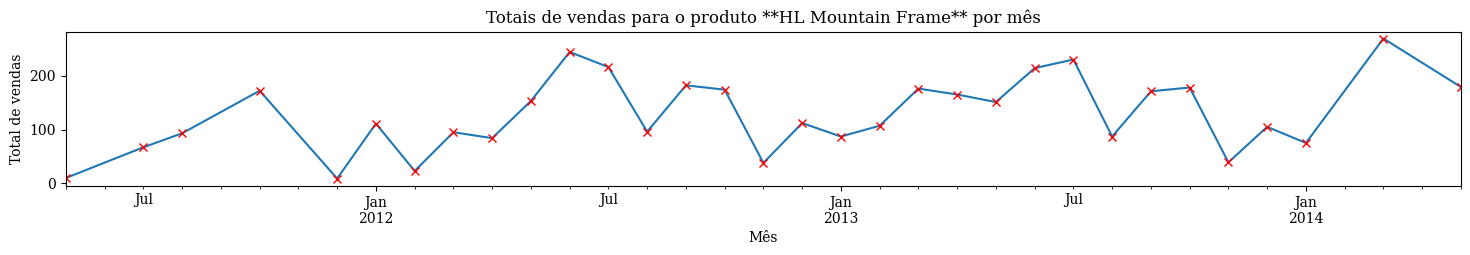

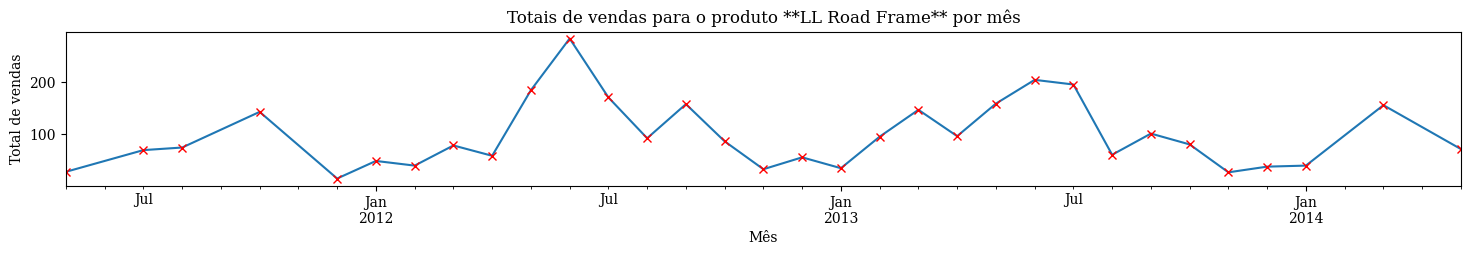

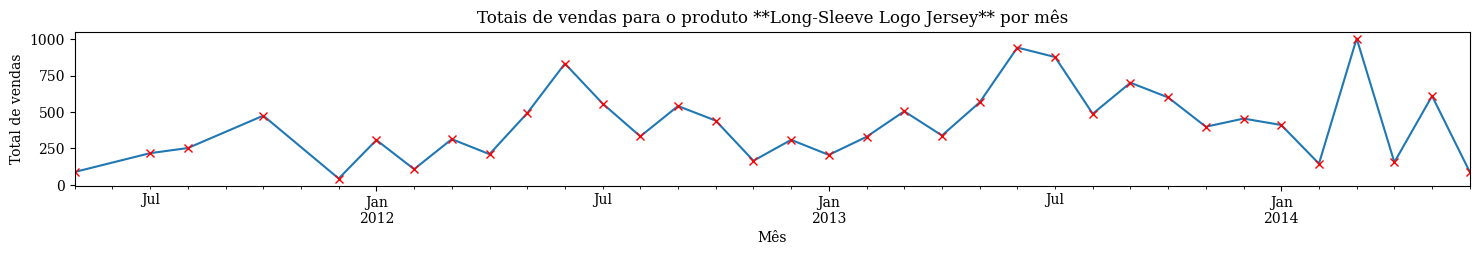

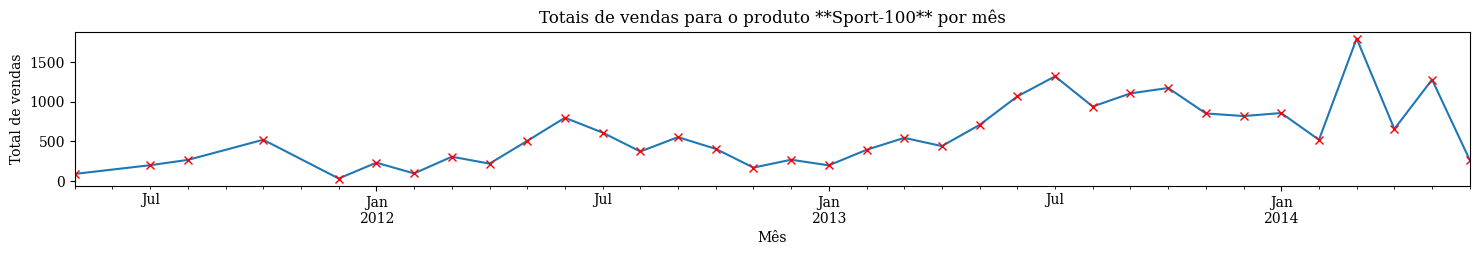

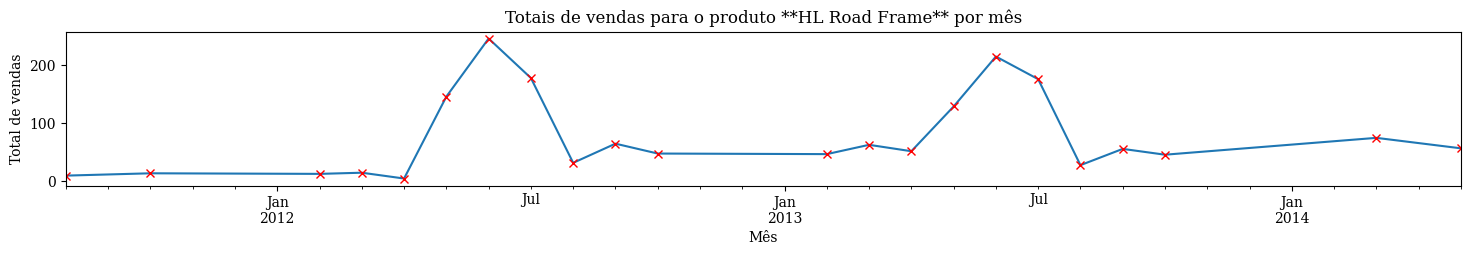

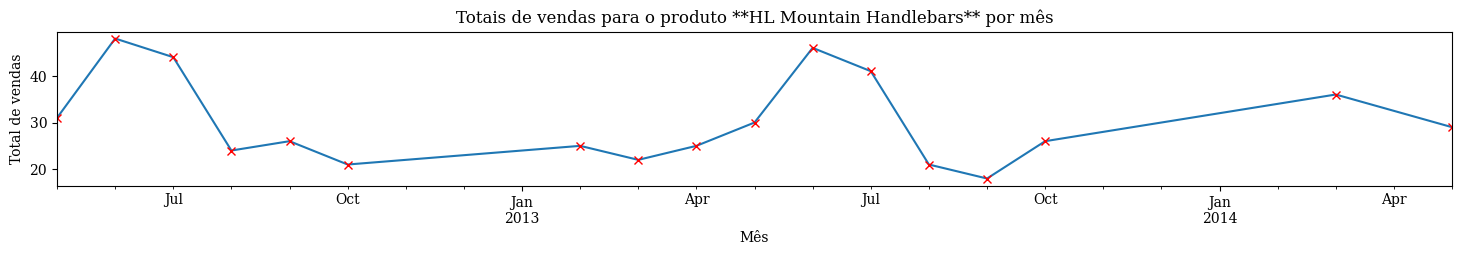

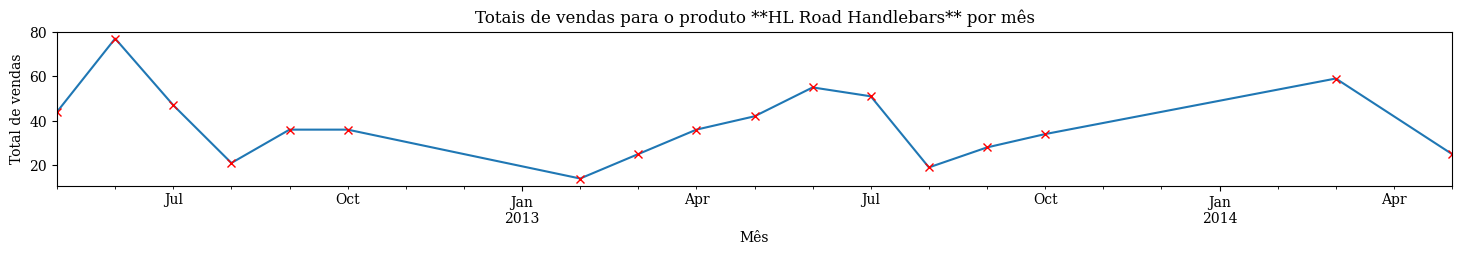

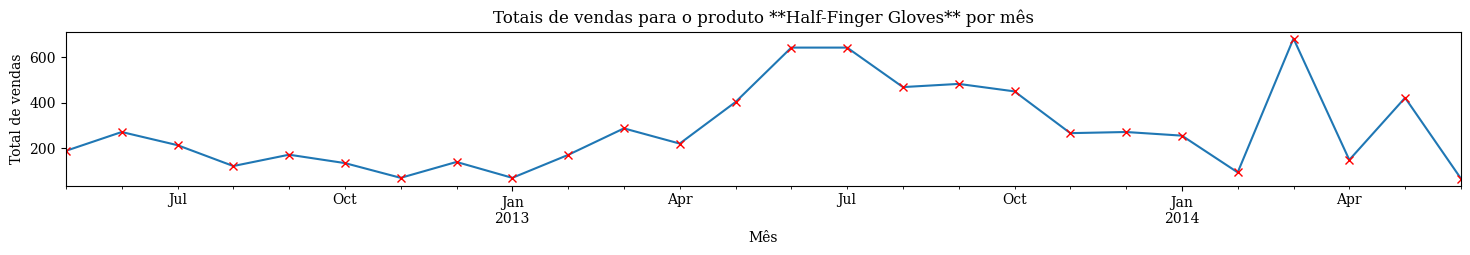

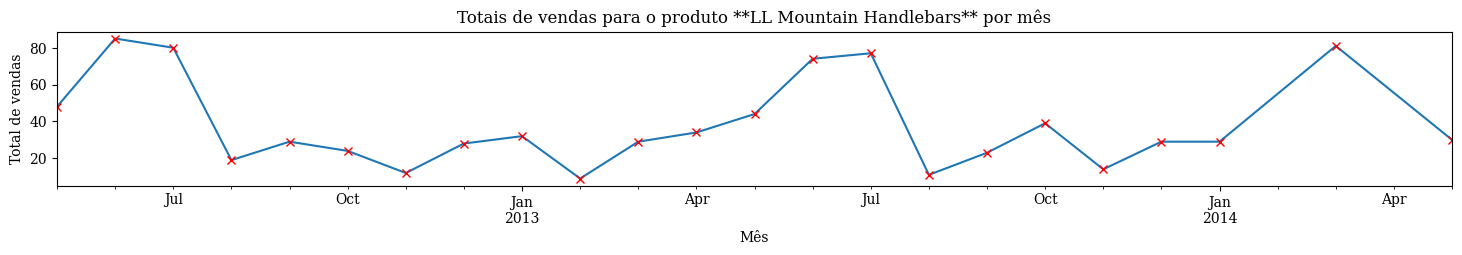

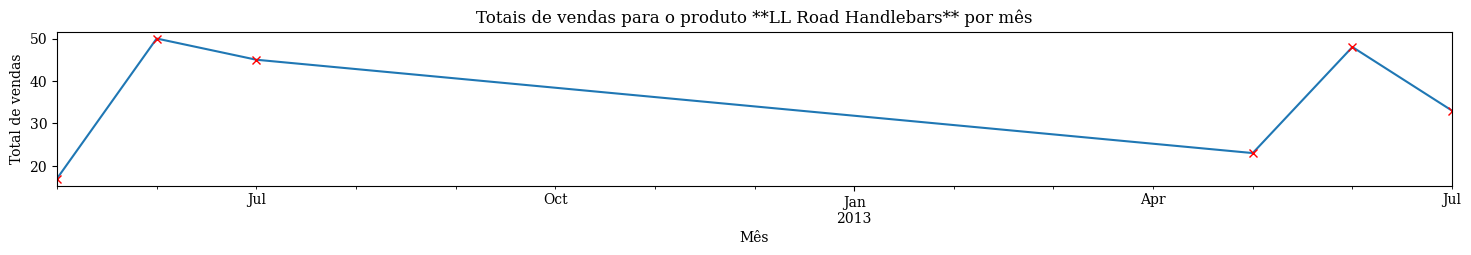

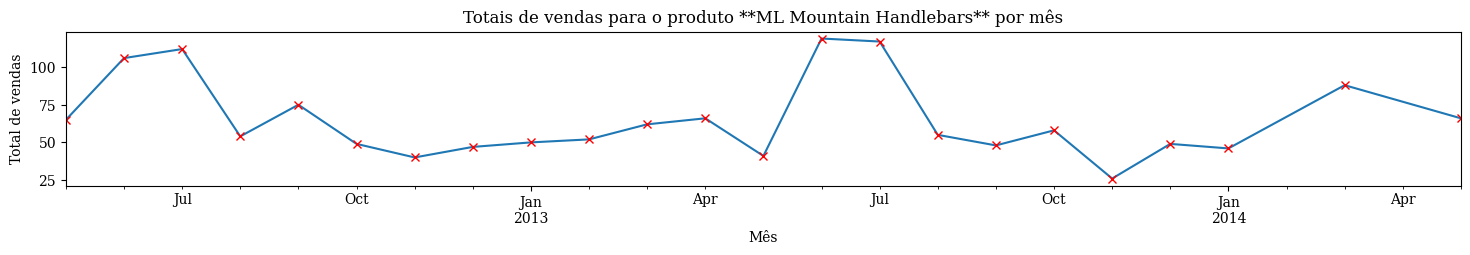

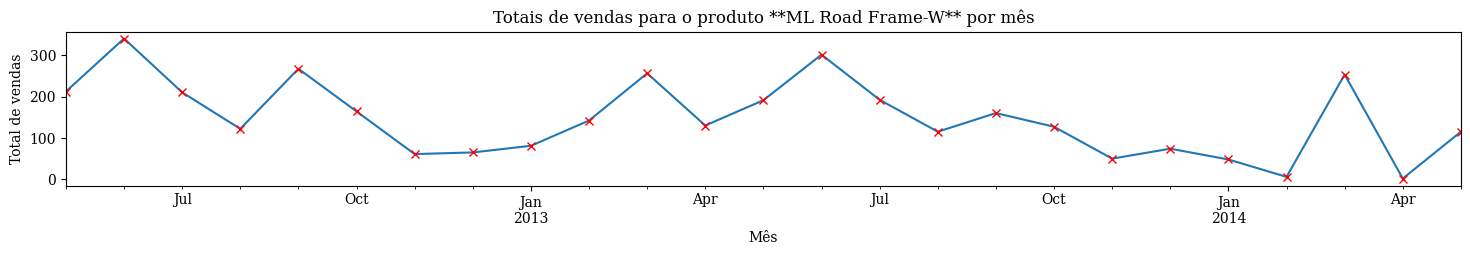

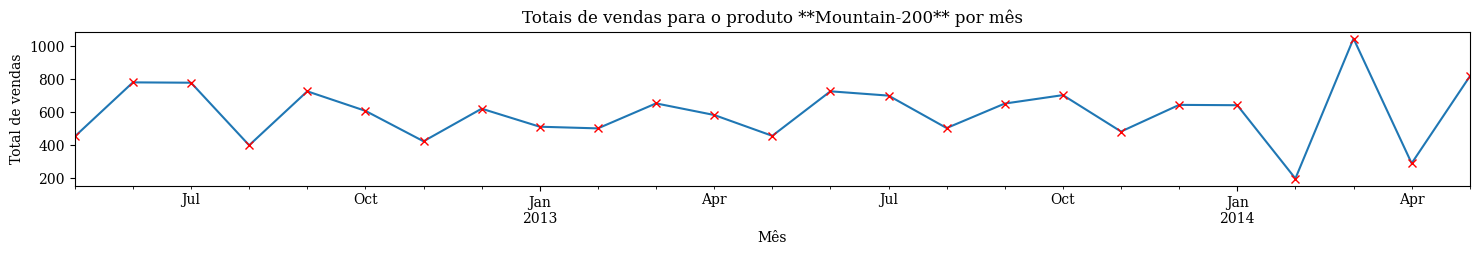

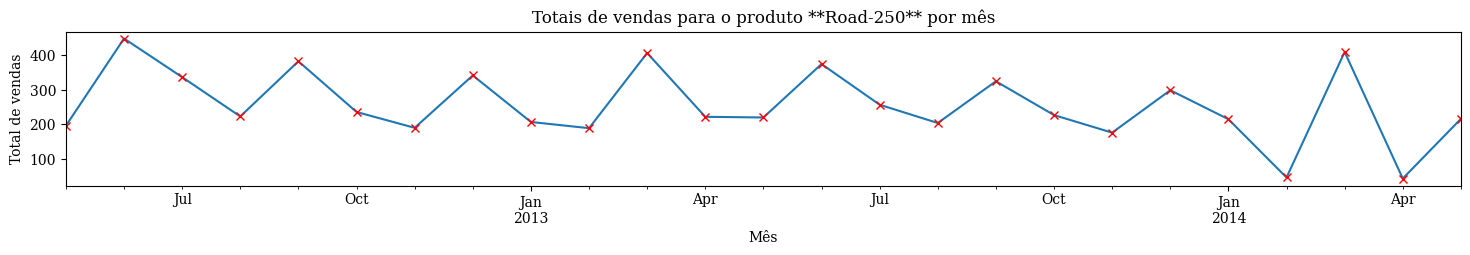

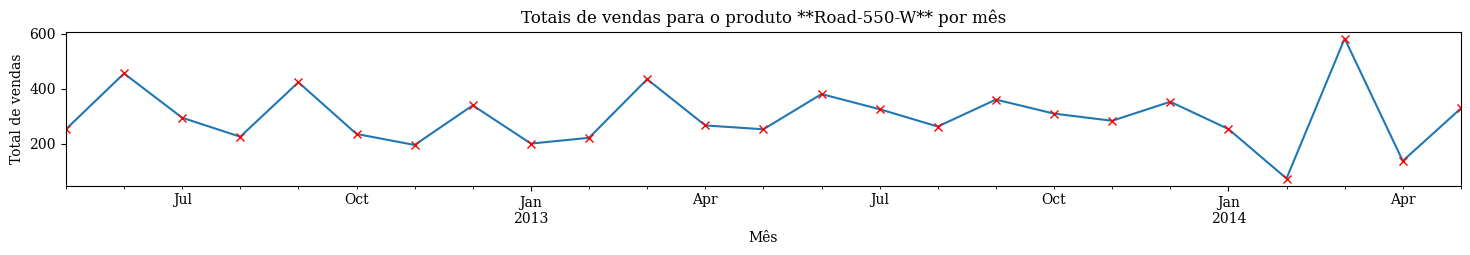

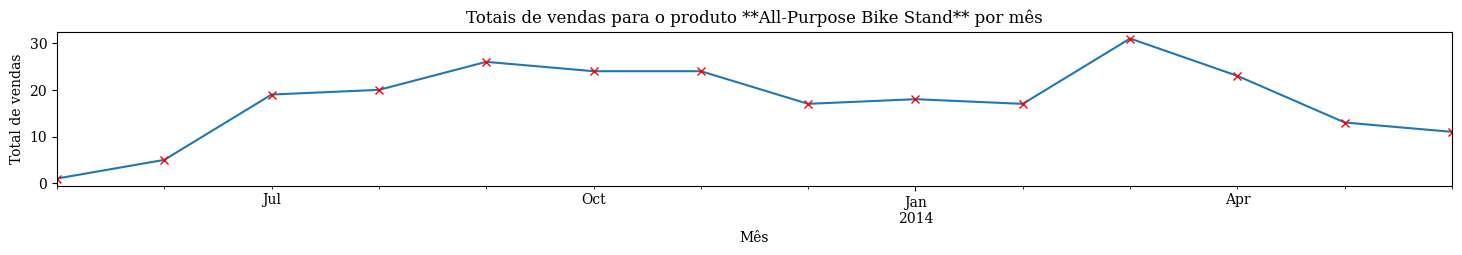

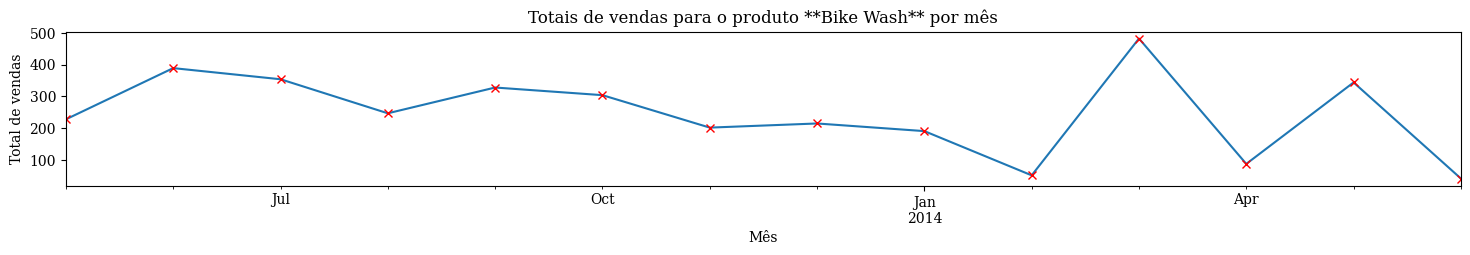

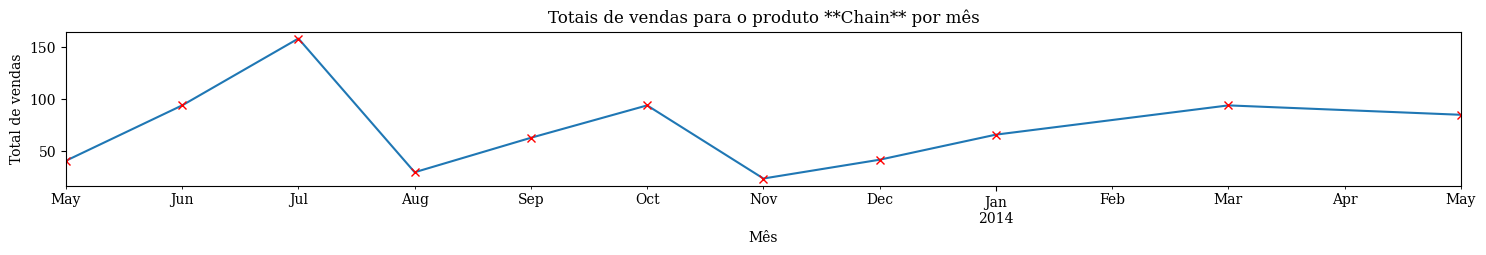

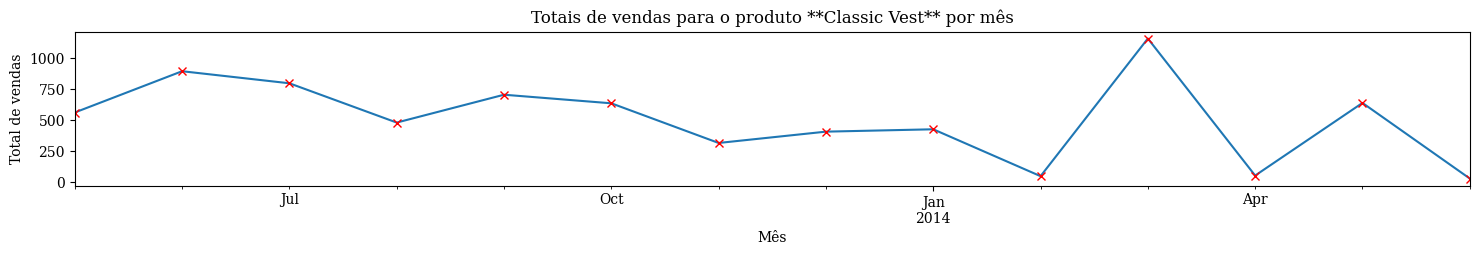

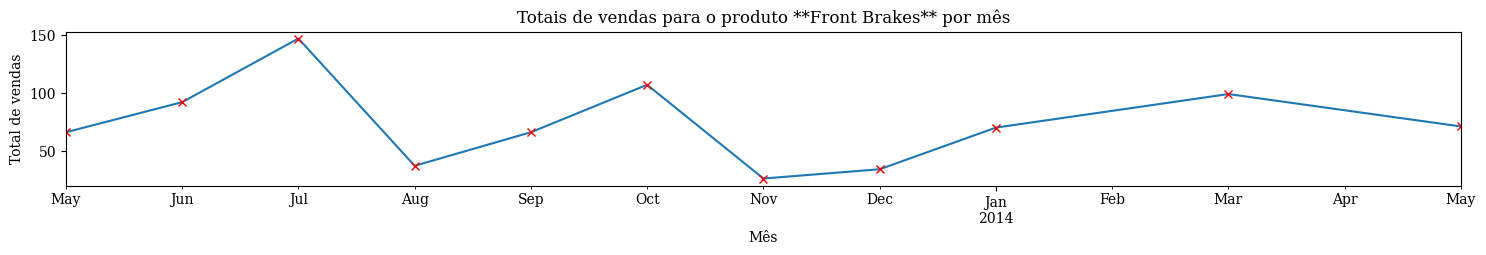

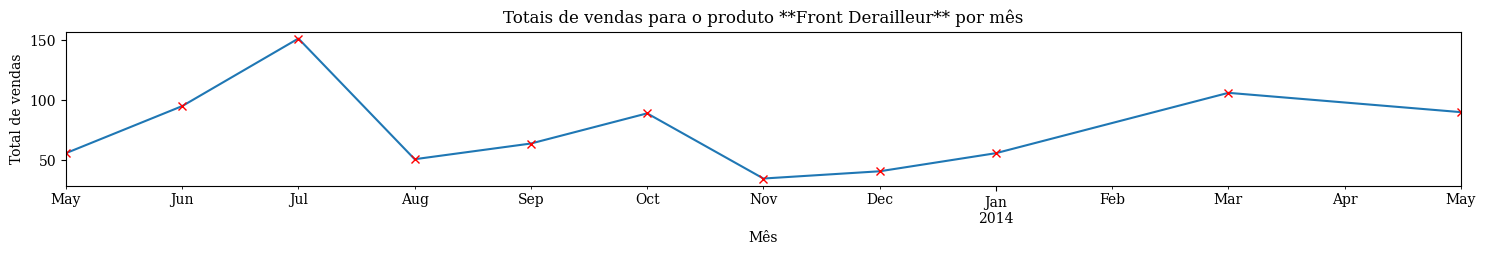

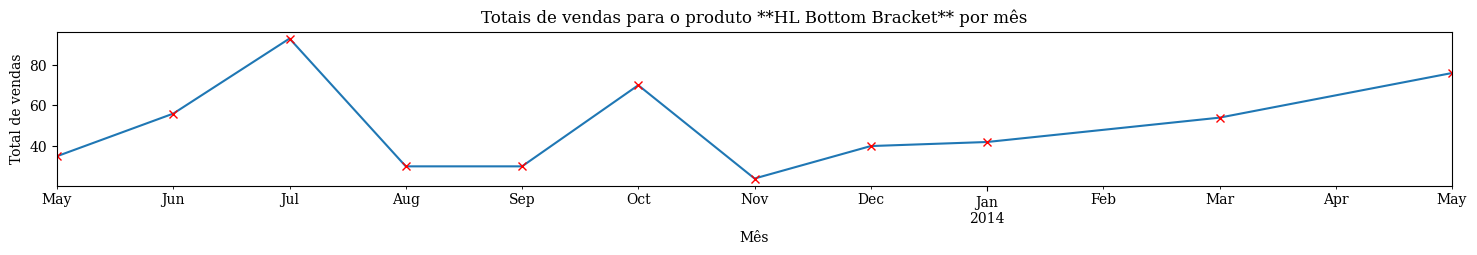

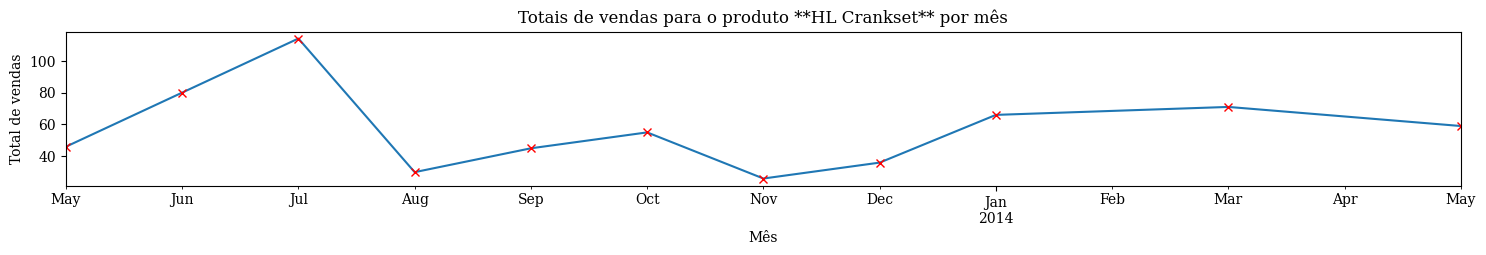

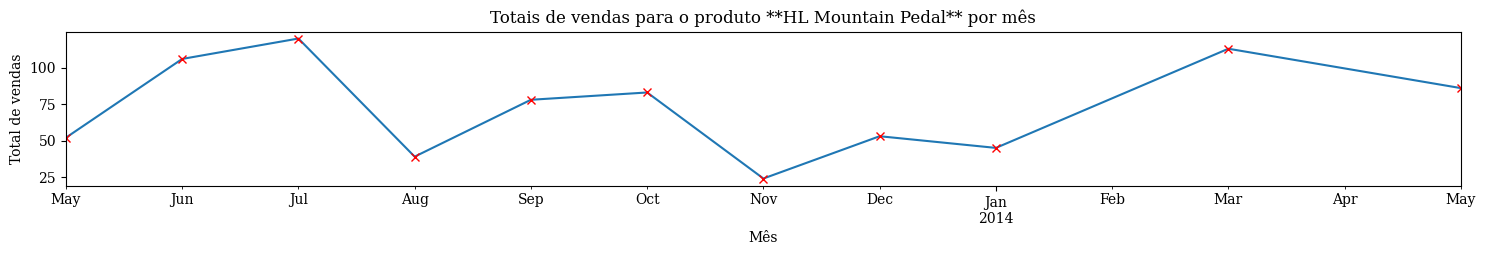

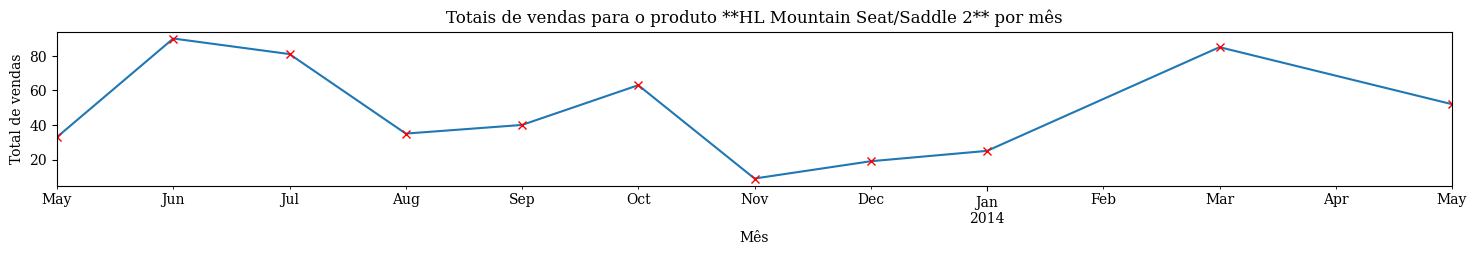

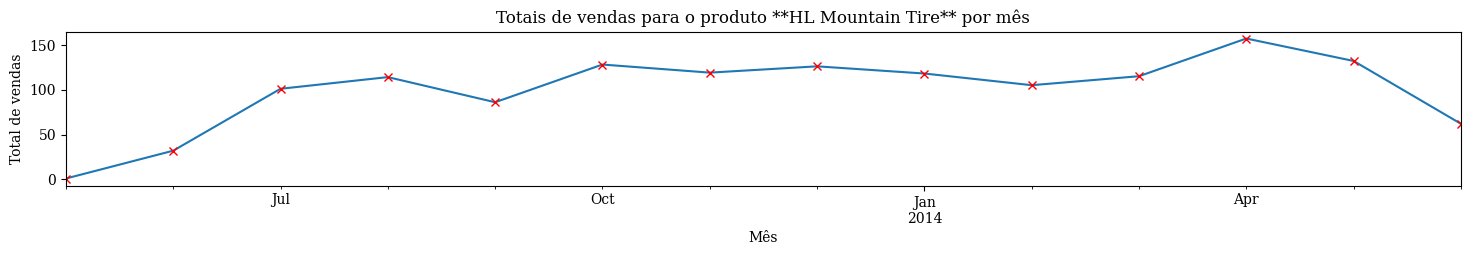

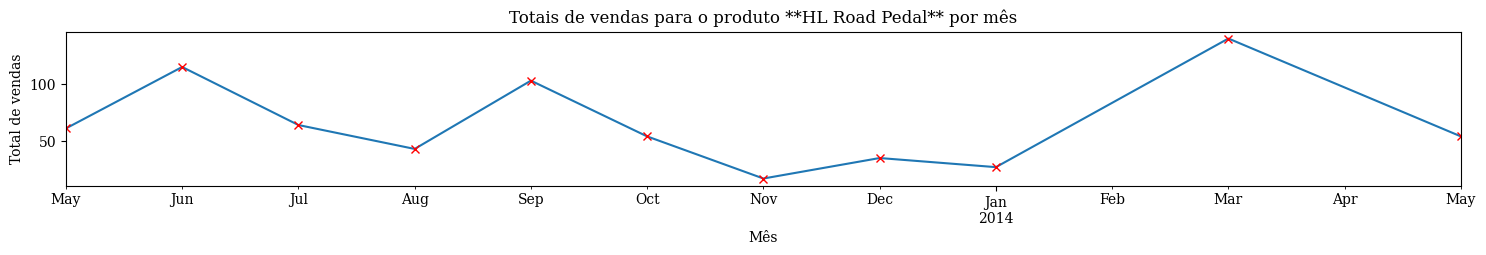

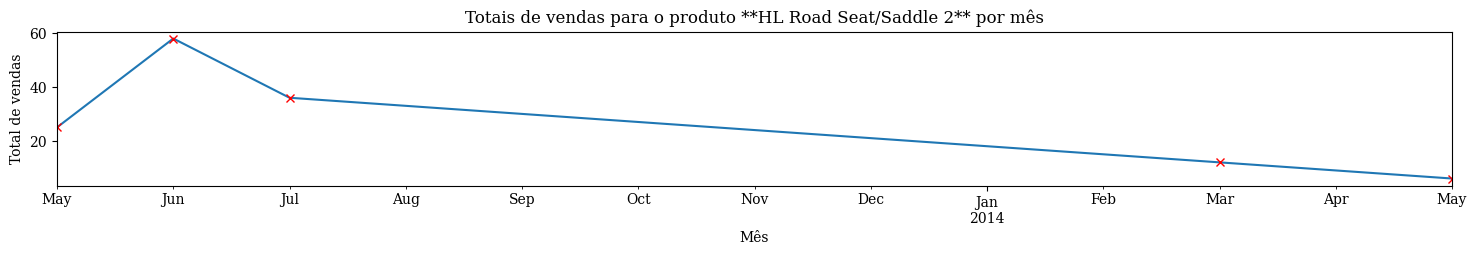

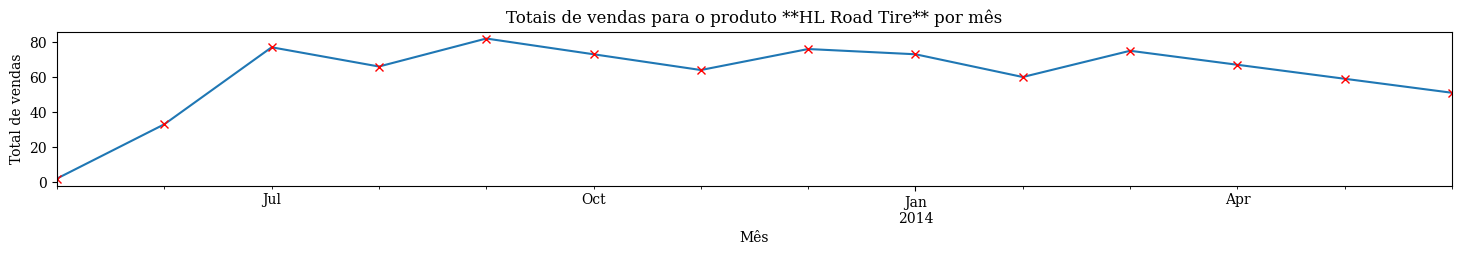

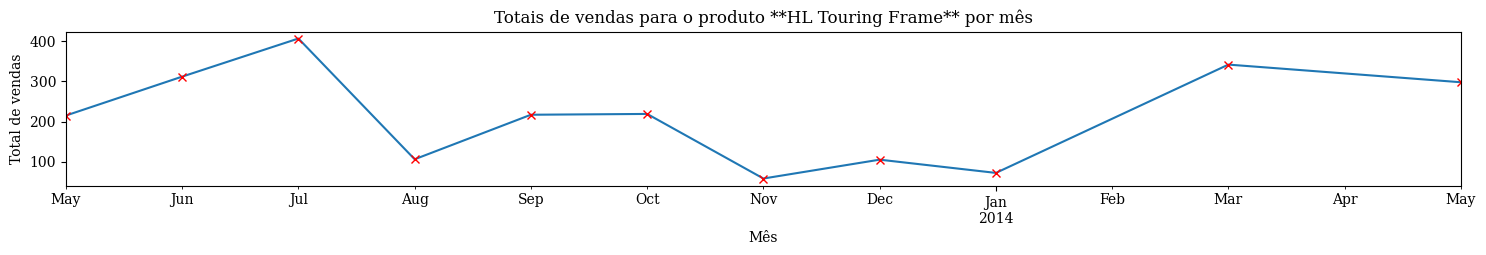

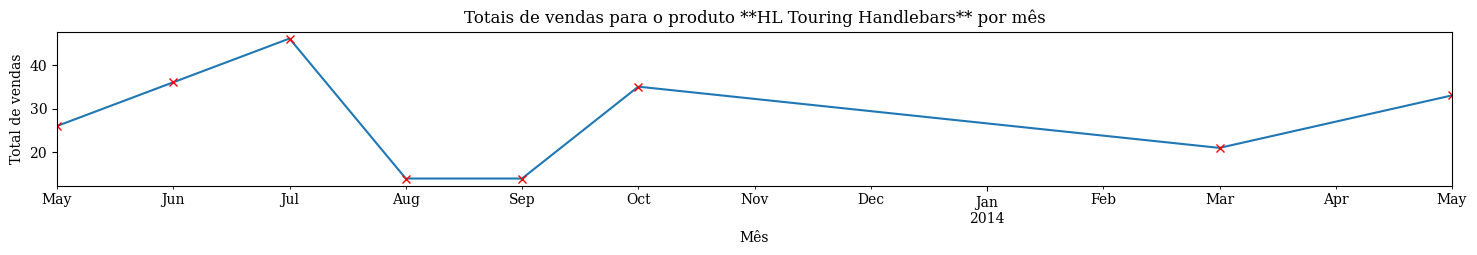

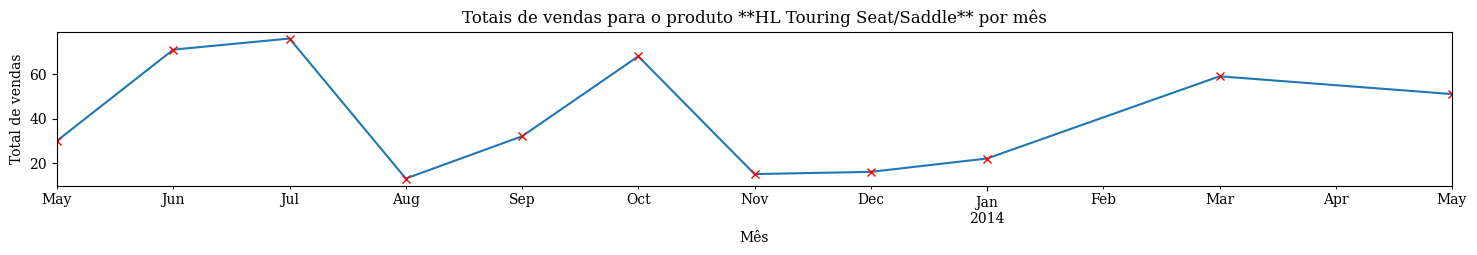

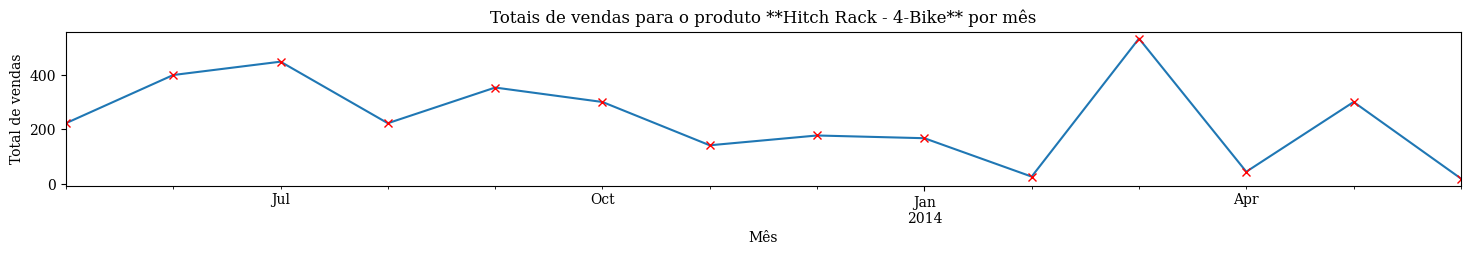

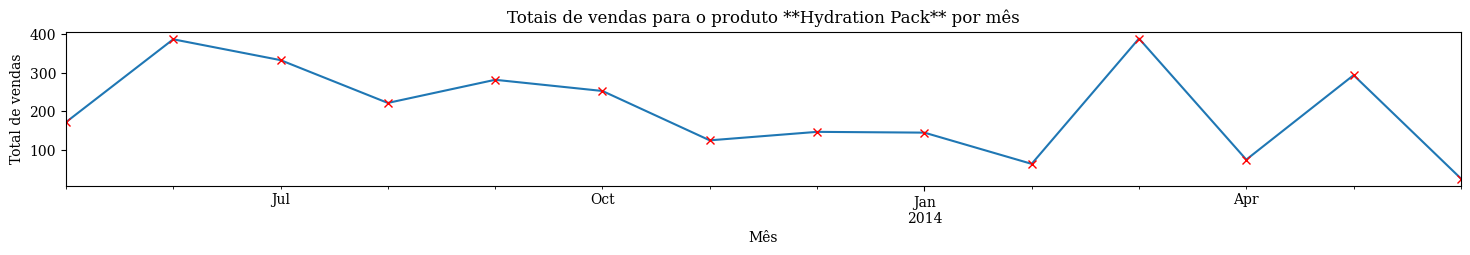

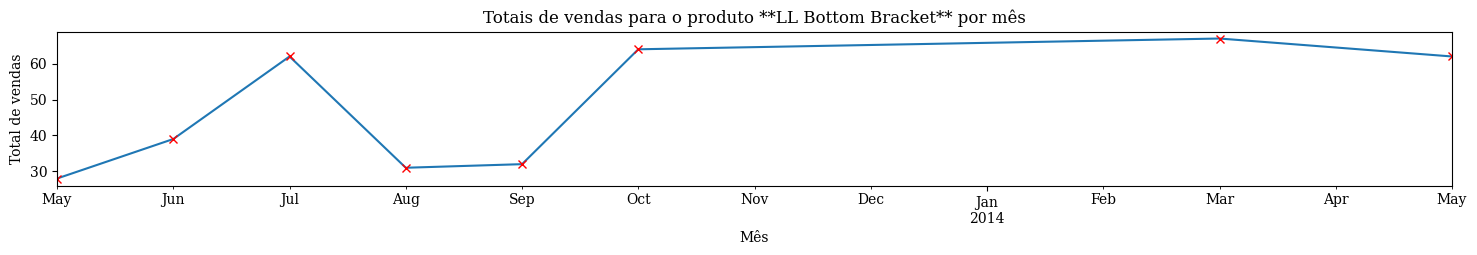

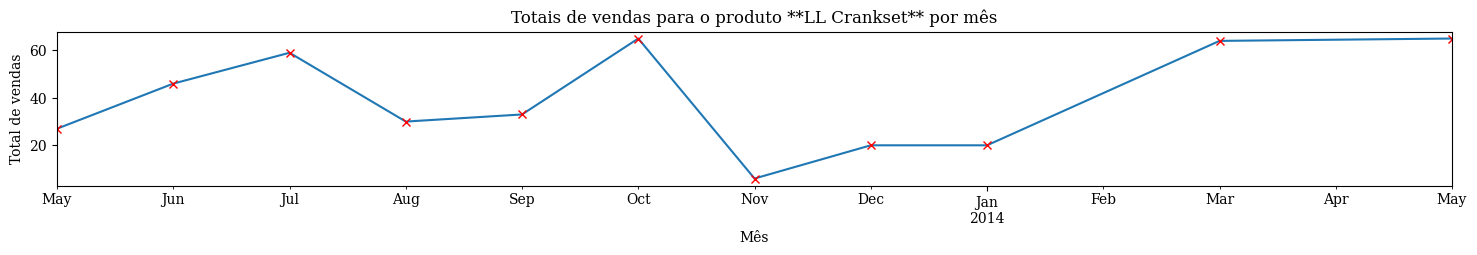

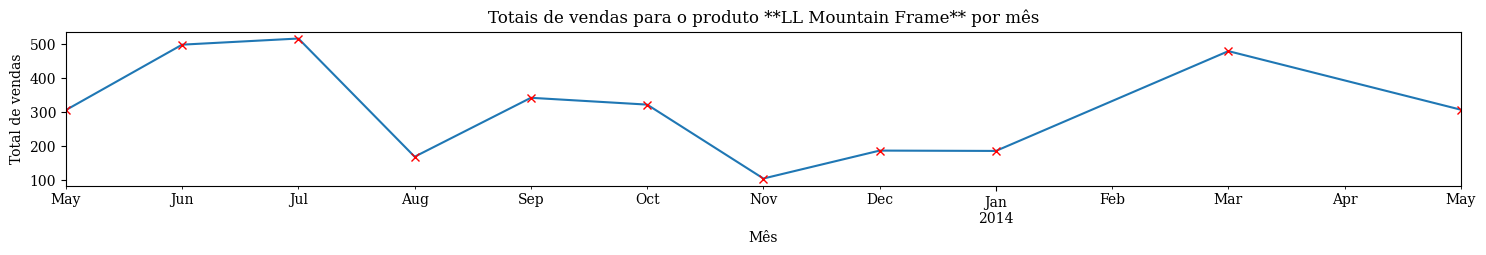

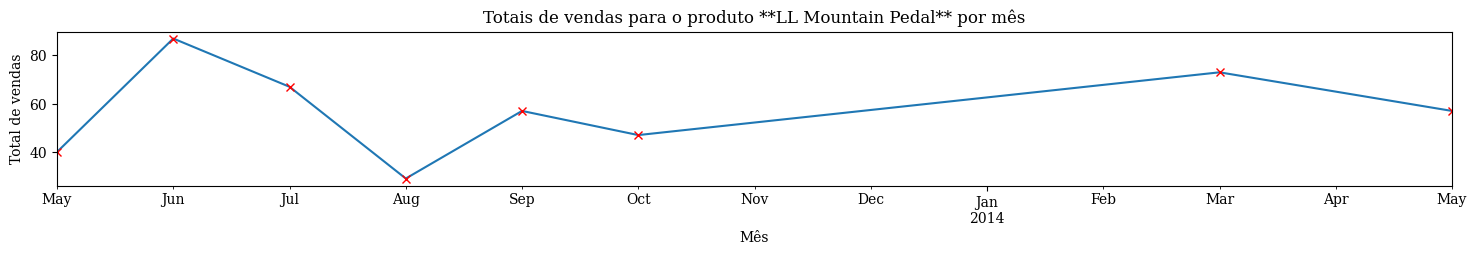

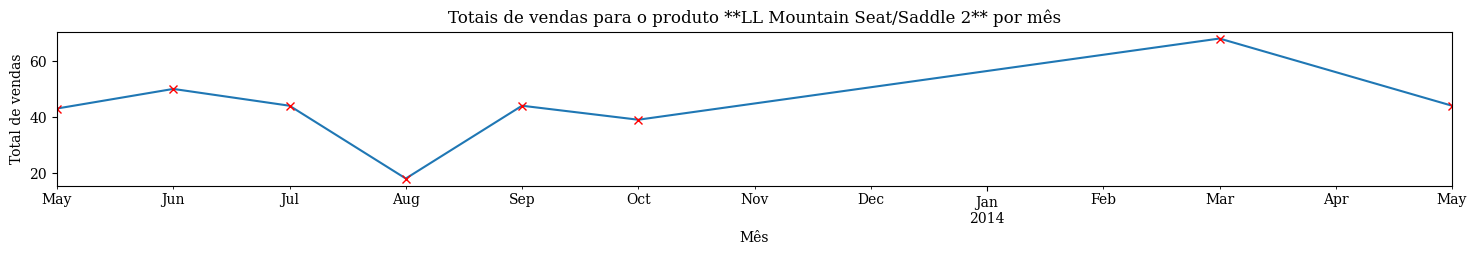

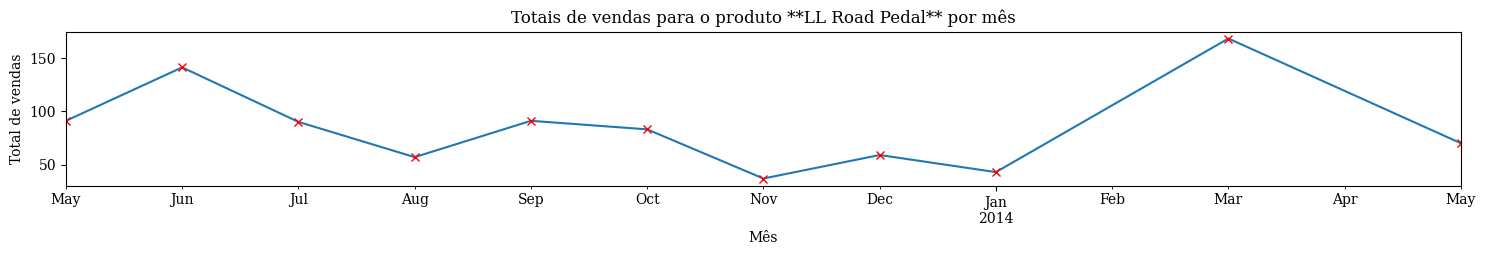

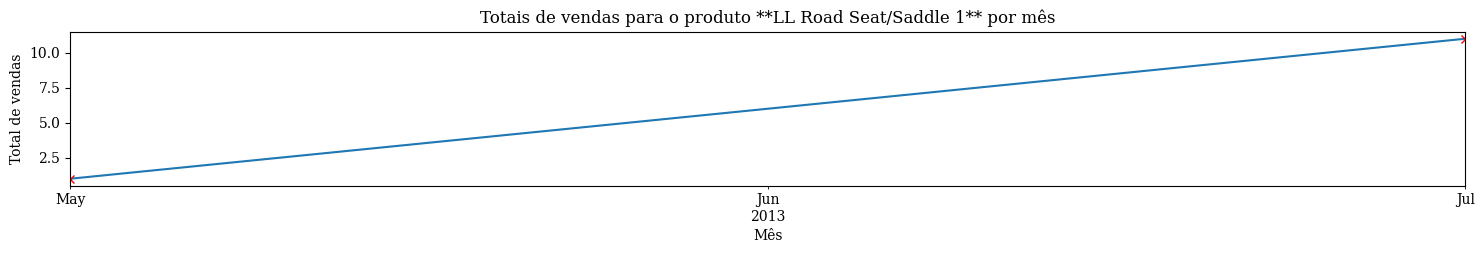

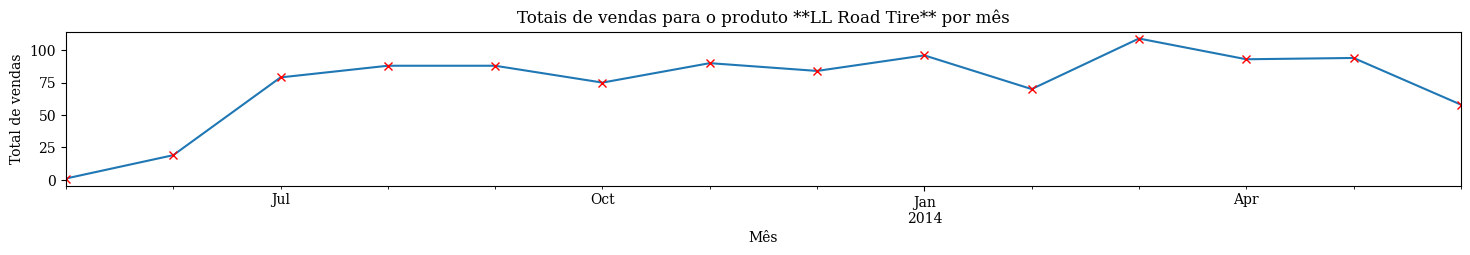

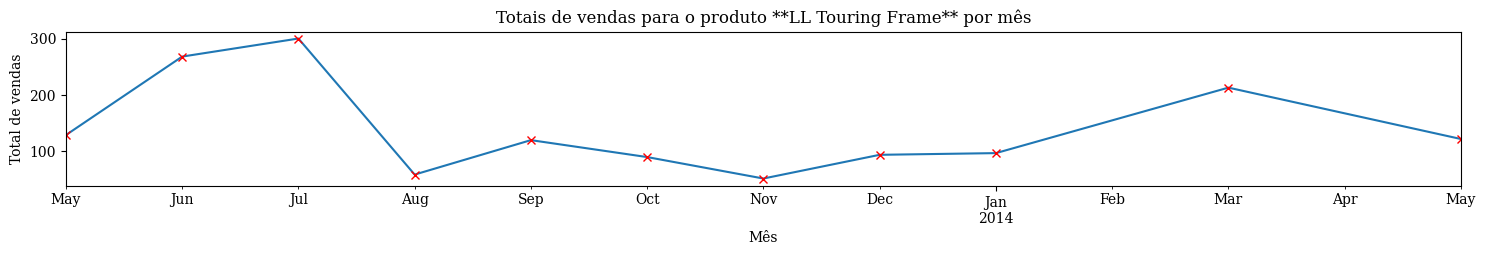

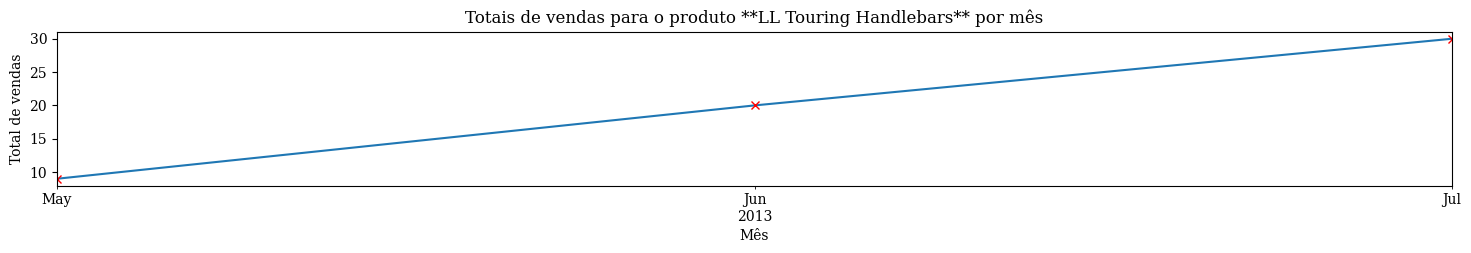

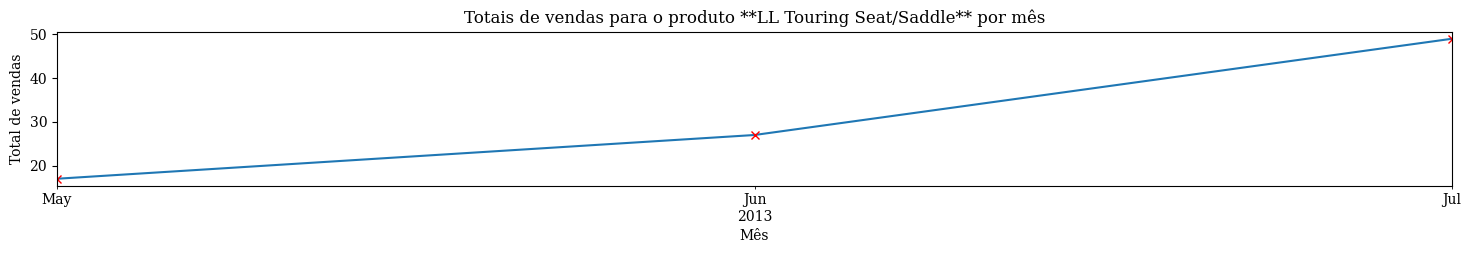

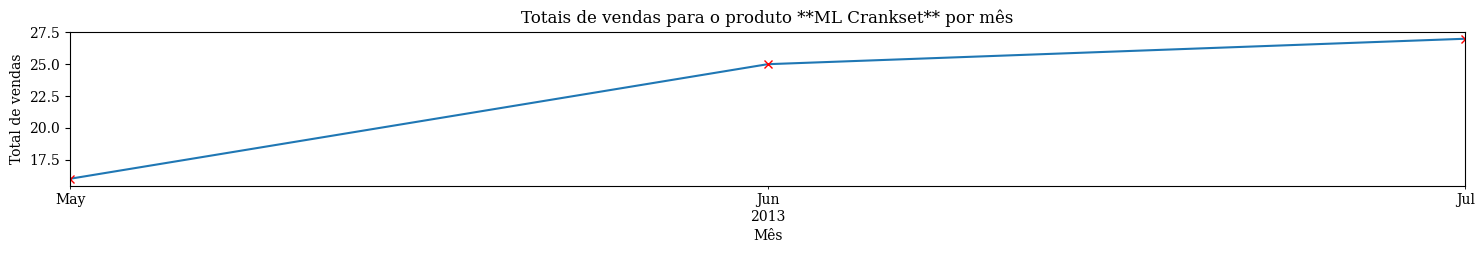

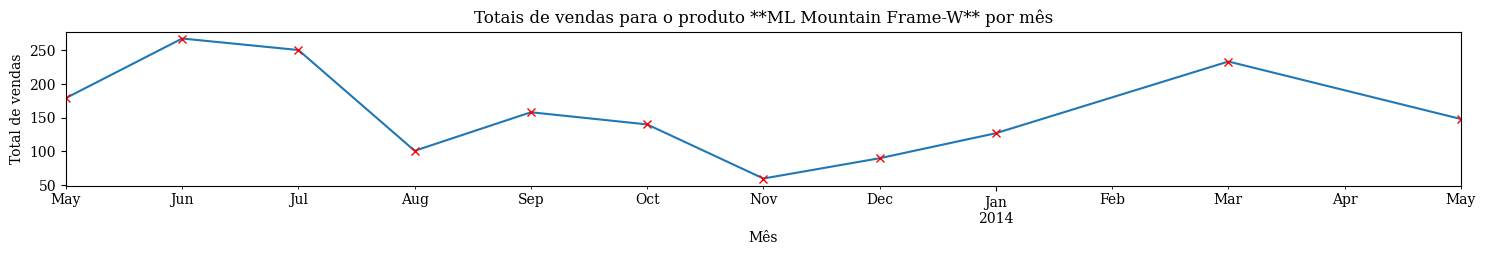

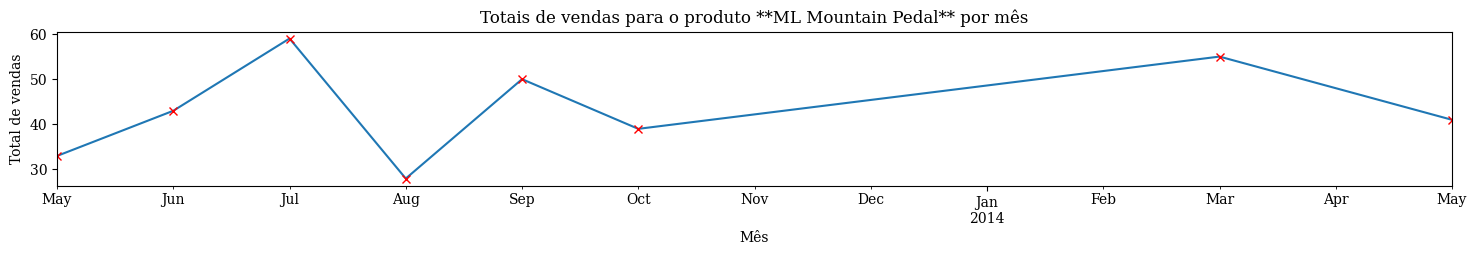

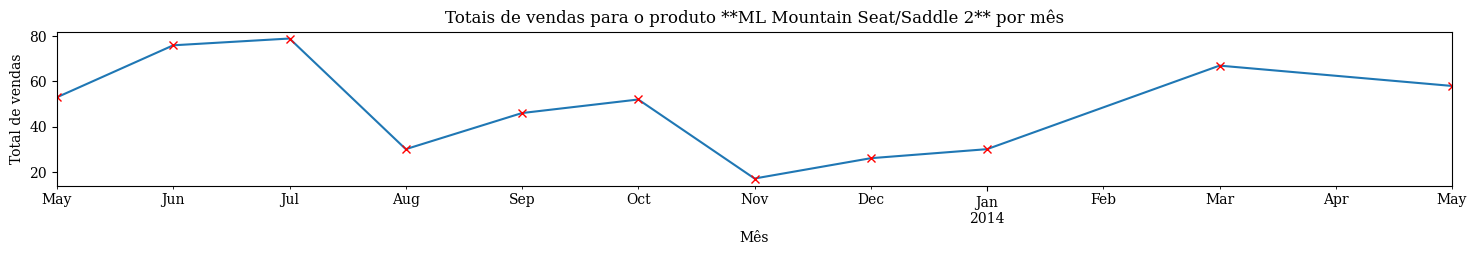

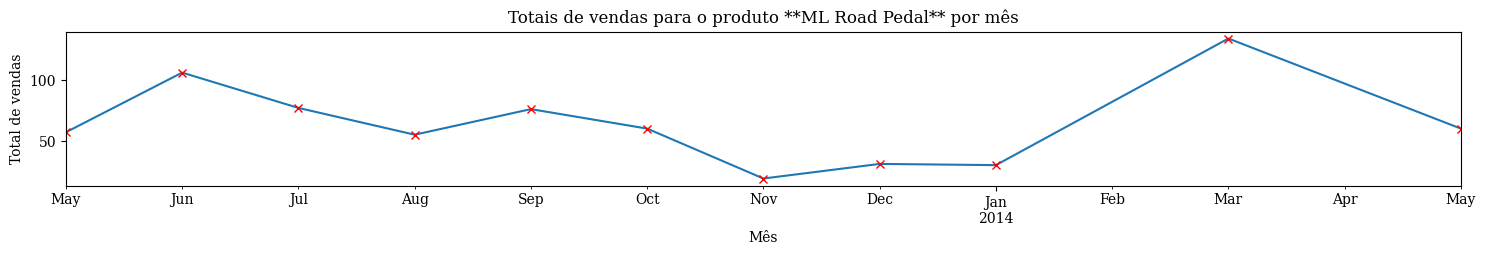

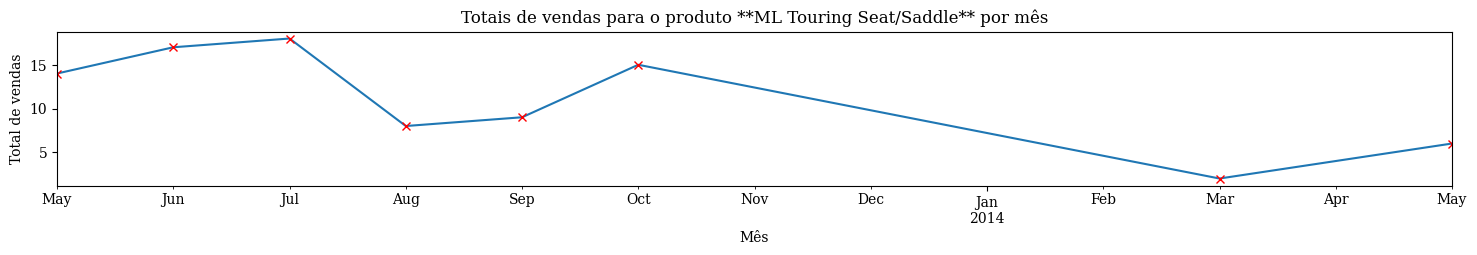

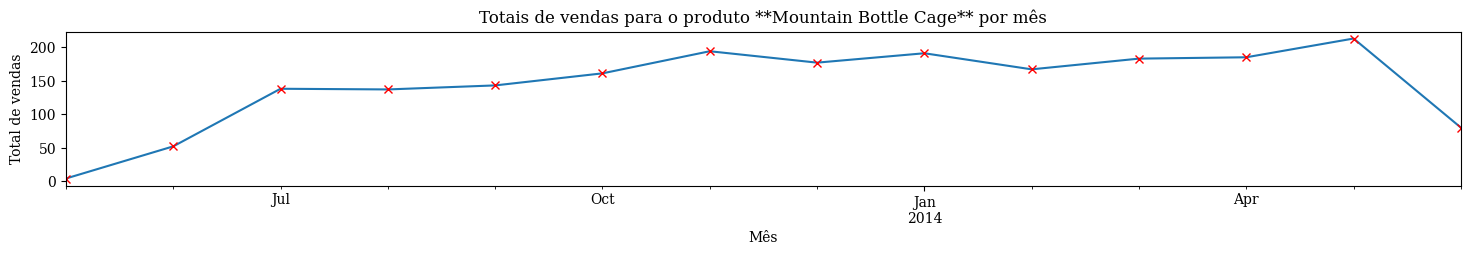

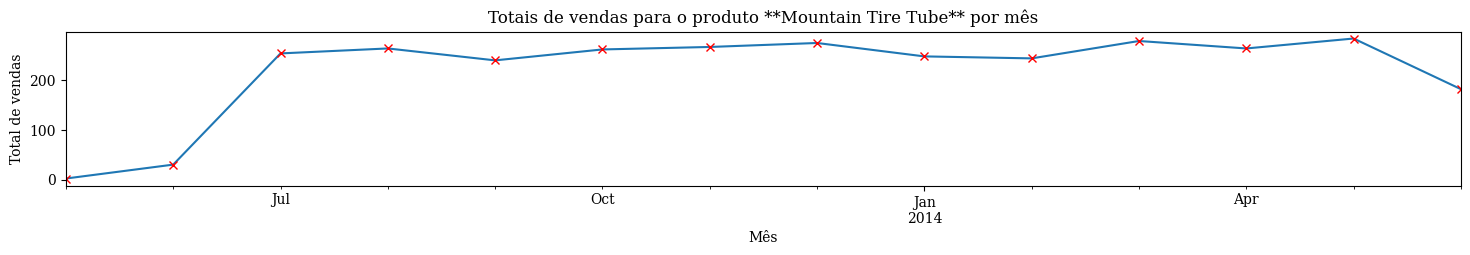

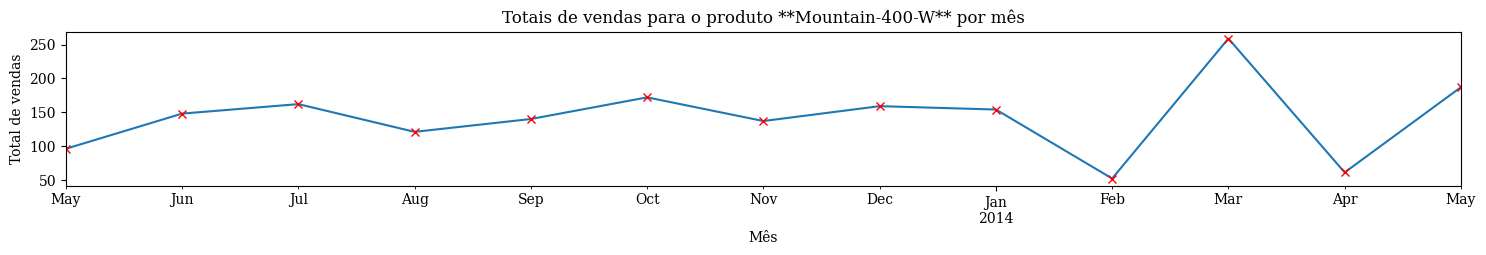

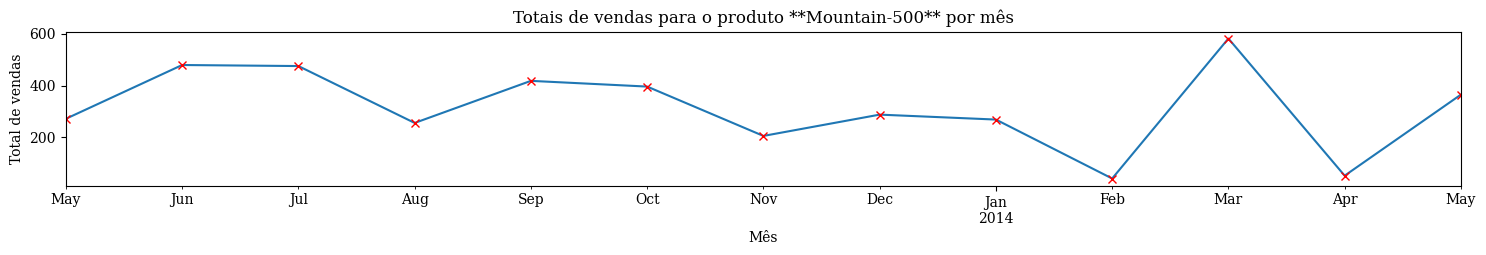

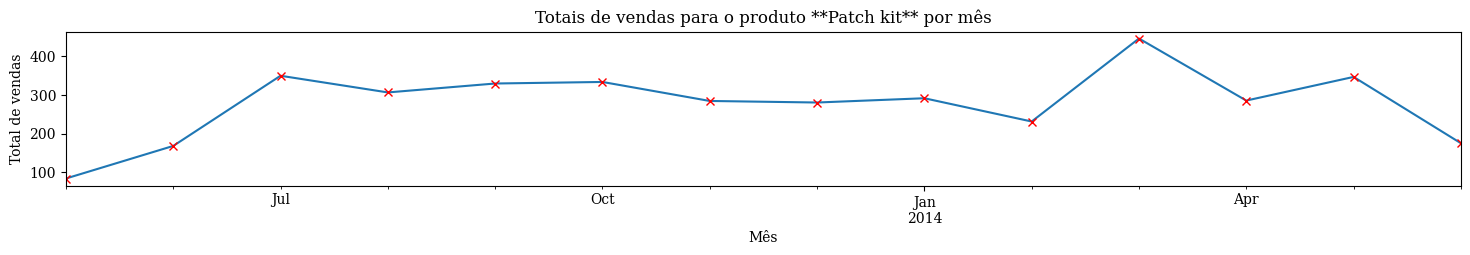

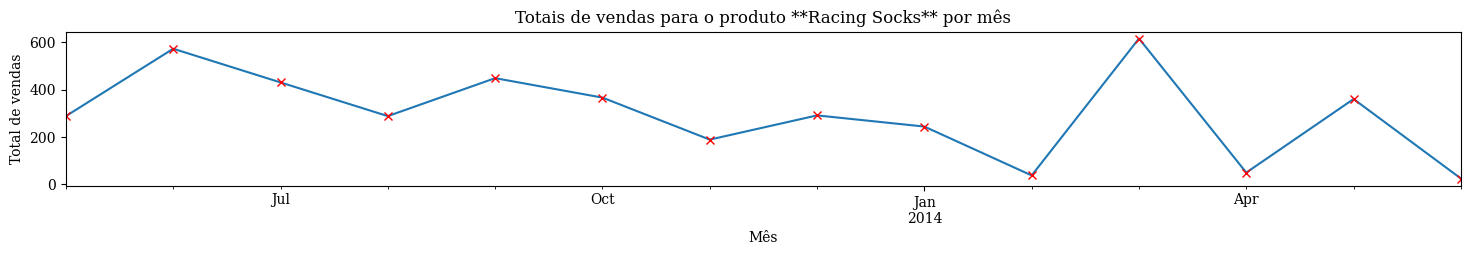

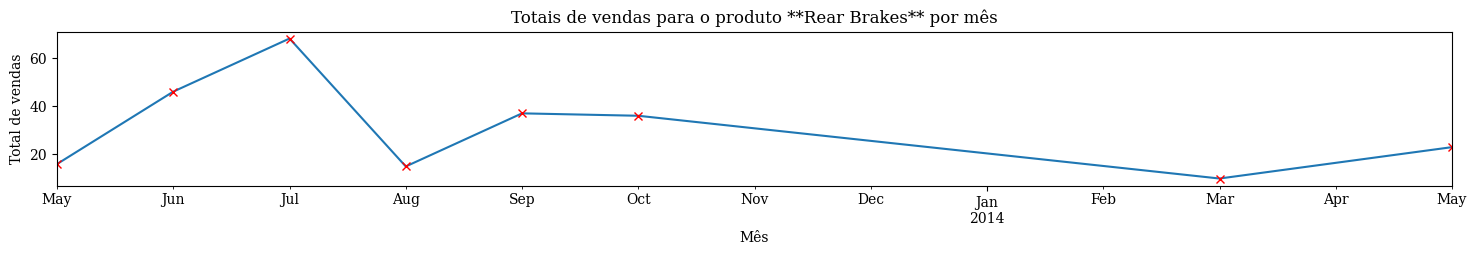

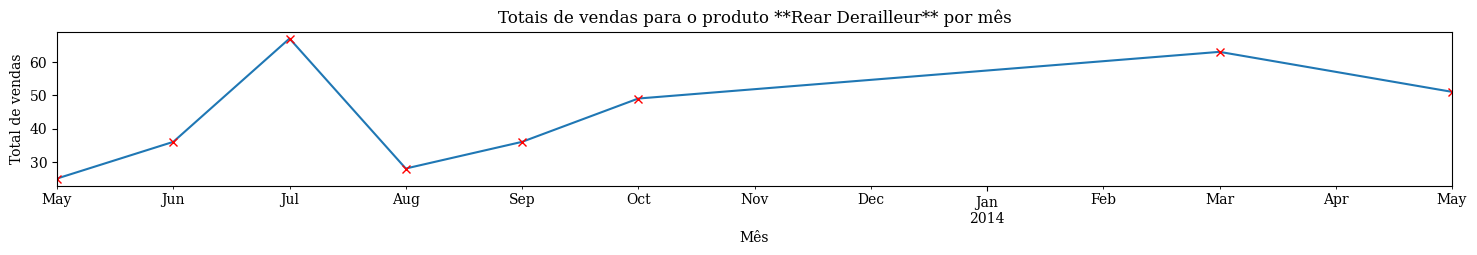

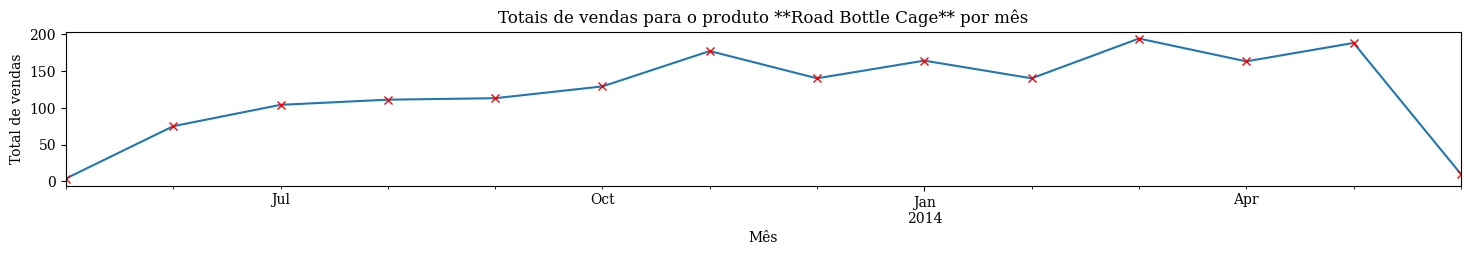

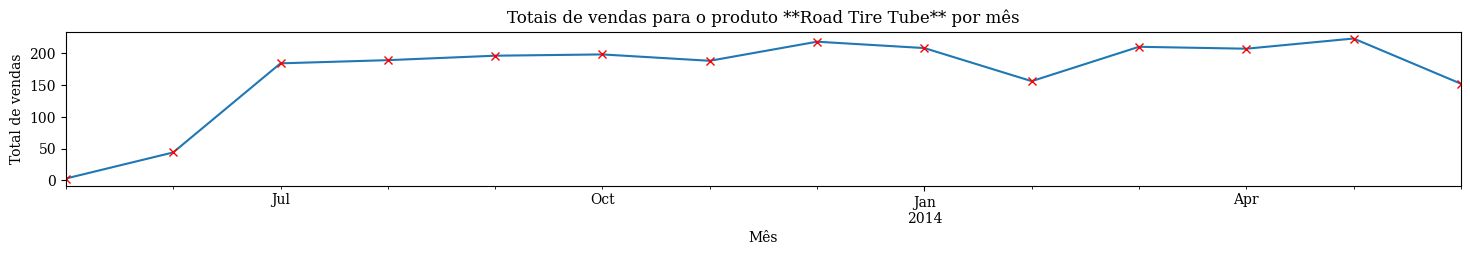

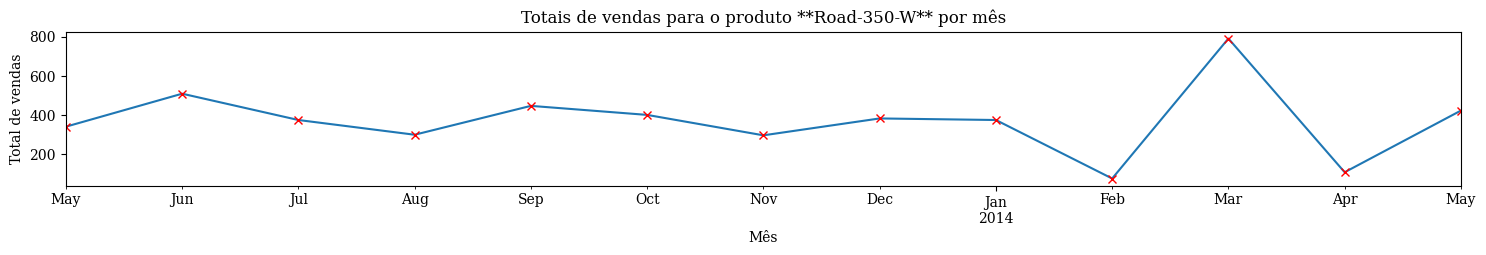

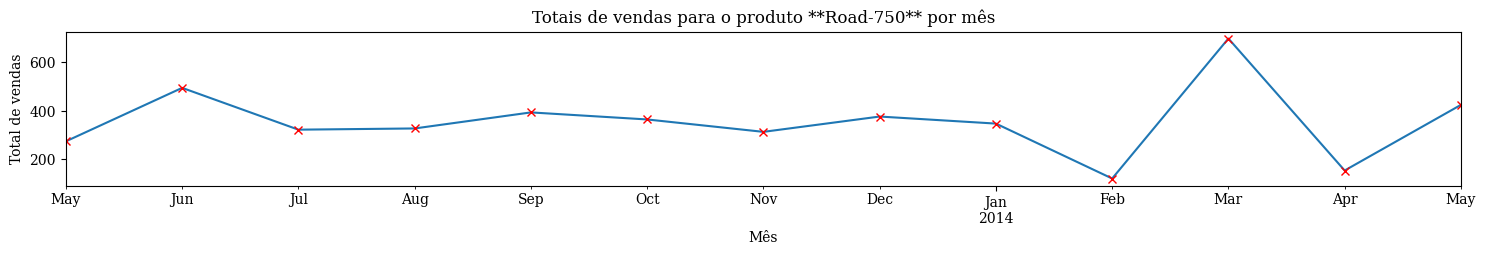

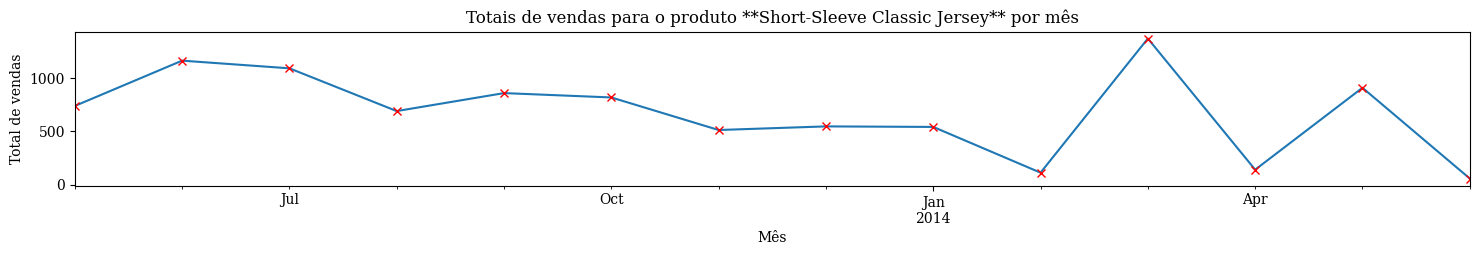

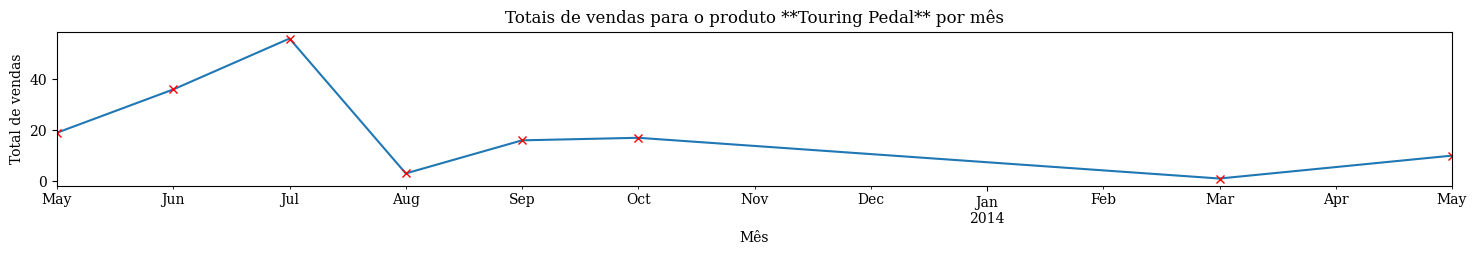

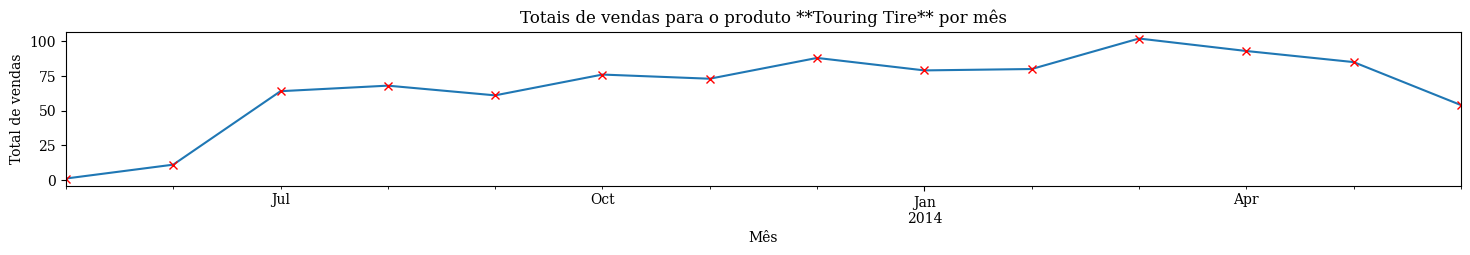

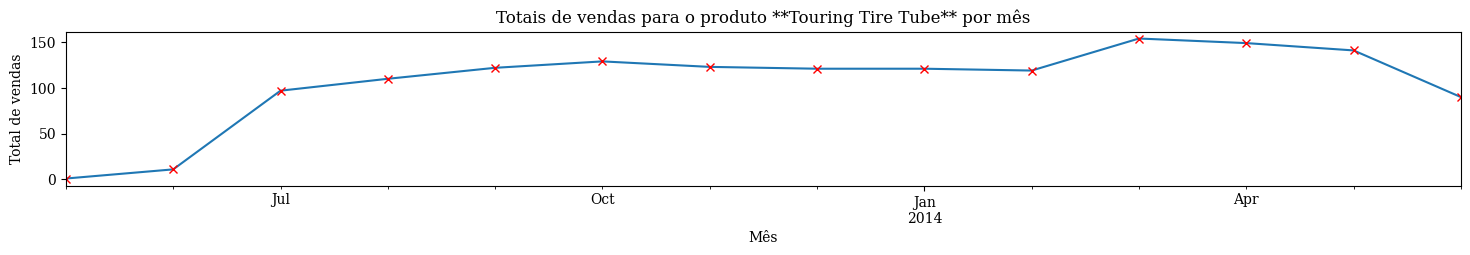

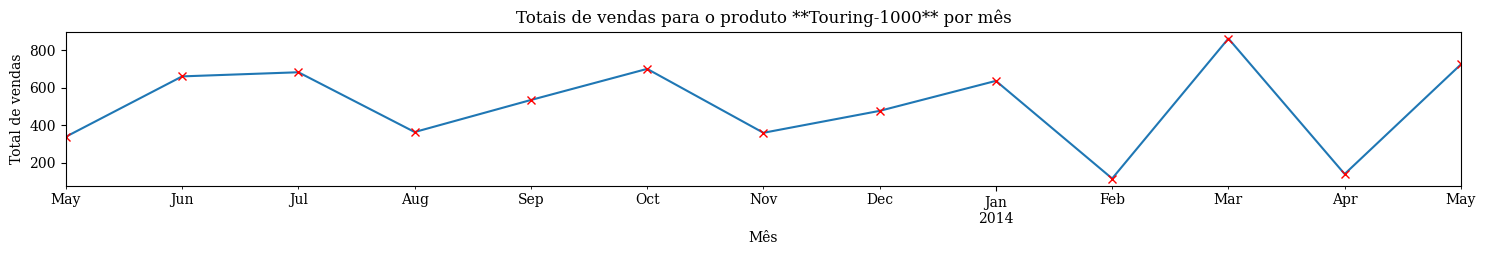

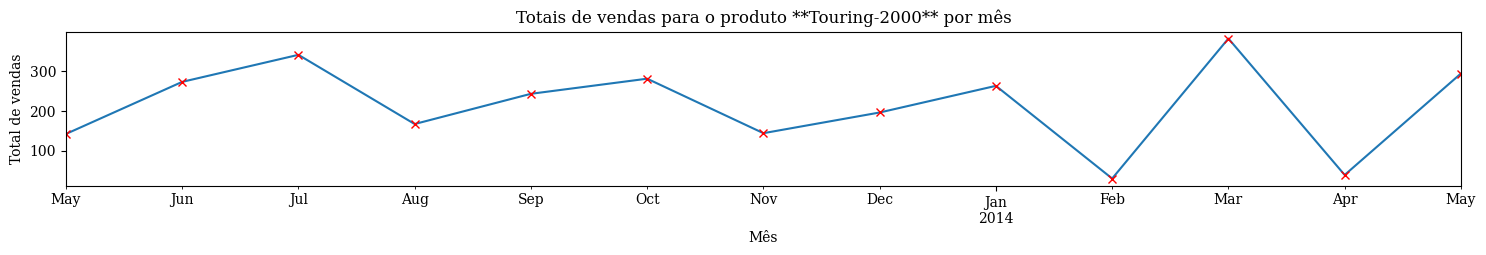

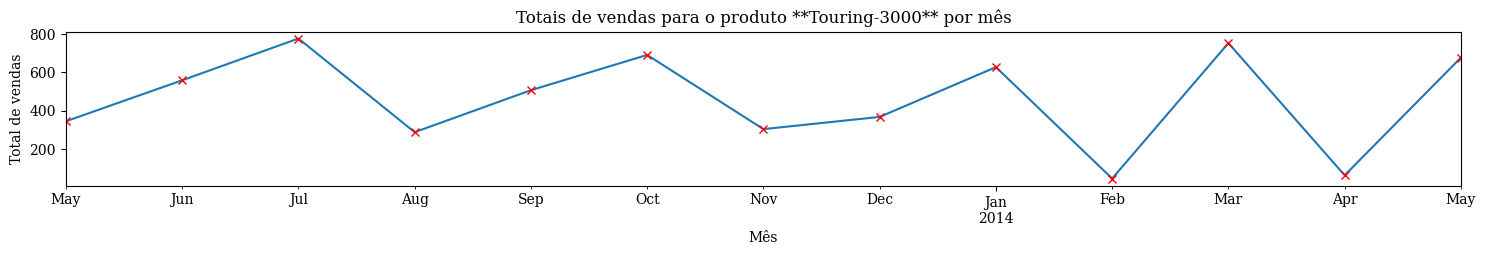

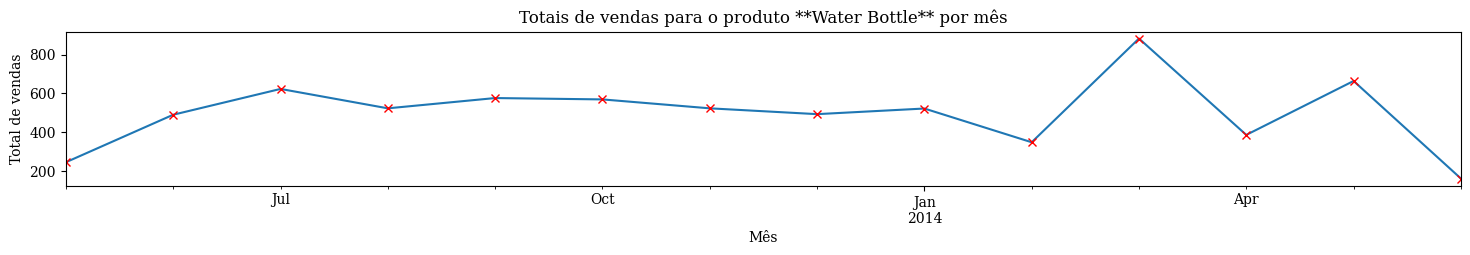

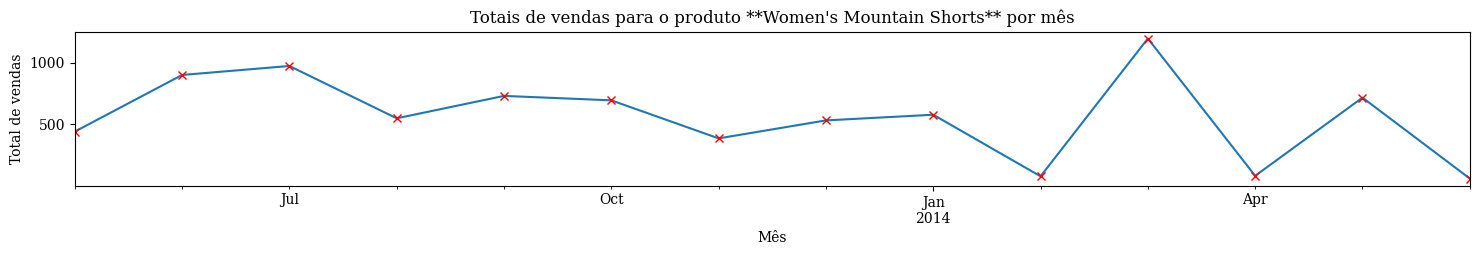

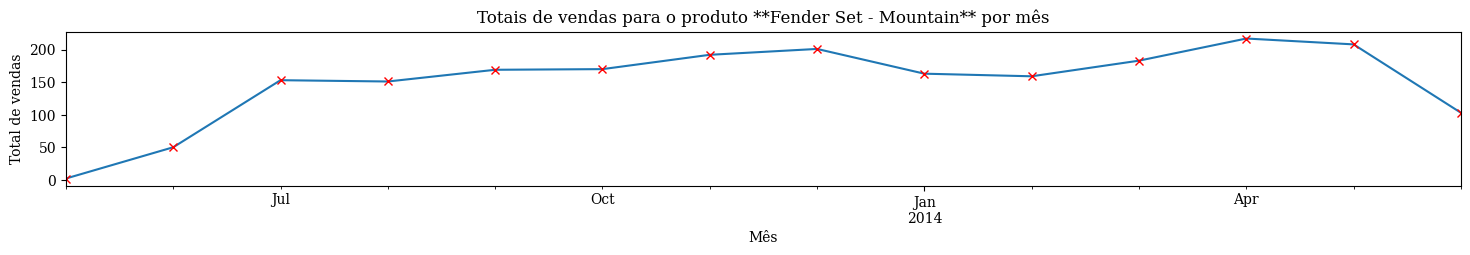

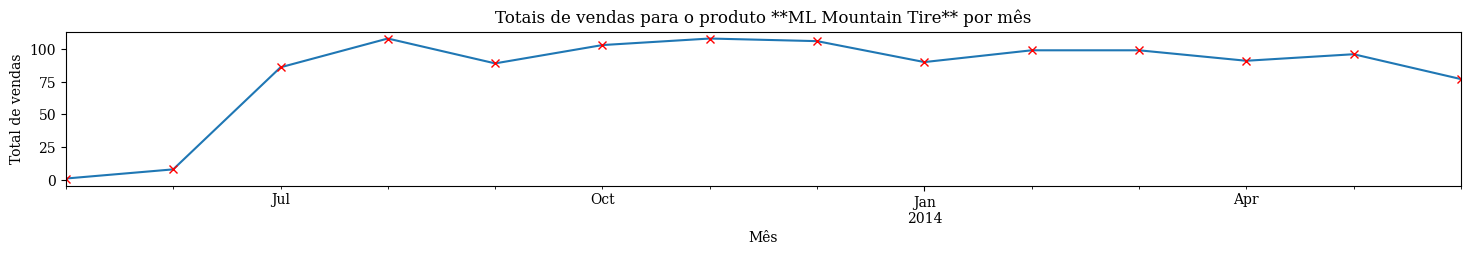

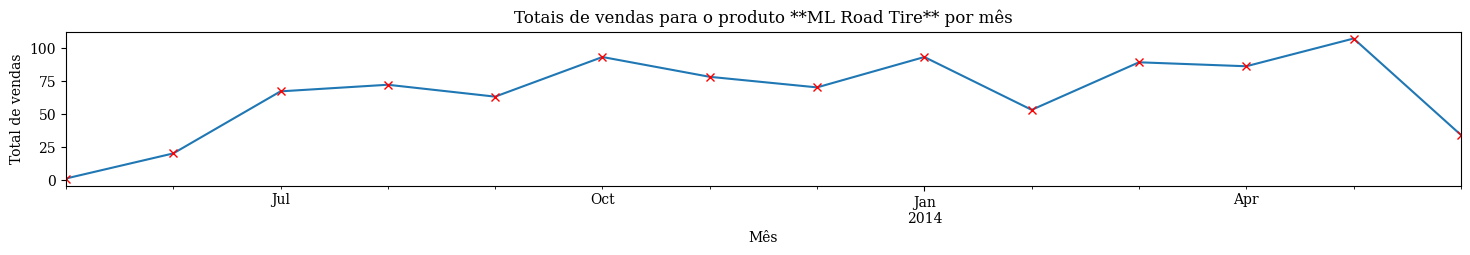

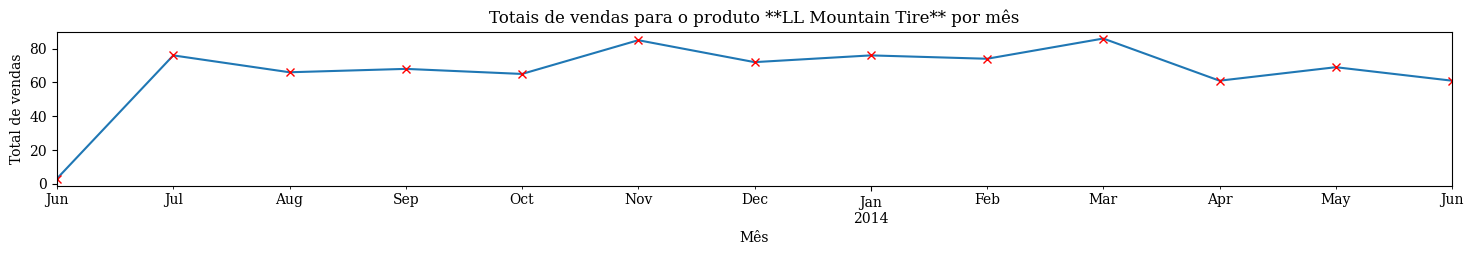

In [16]:
# Copia o DataFrame original
df_aux = df.copy()

# Cria uma nova coluna 'ano-mês' no DataFrame
df_aux['ano_mes'] = df_aux.index.to_period('M')

# Obtém a lista de todos os modelos de produtos únicos
produtos = df_aux['productmodel_name'].unique()

# Para cada modelo de produto, cria um gráfico separado
for produto in produtos:
    # Filtra os dados para o modelo de produto atual
    df_produto = df_aux[df_aux['productmodel_name'] == produto]
    
    # Agrupa os dados por 'ano-mês' e soma as vendas
    df_grouped = df_produto.groupby('ano_mes')['total_qtd_product'].sum()
    
    # Cria o gráfico
    df_grouped.plot(kind='line', figsize=(18,2))

    # Adiciona marcações com 'x' vermelho nos pontos de dados
    df_grouped.plot(marker='x', linestyle='', color='red')
    
    plt.title(f'Totais de vendas para o produto **{produto}** por mês')
    plt.xlabel('Mês')
    plt.ylabel('Total de vendas')
    plt.show()


## Período registrado das vendas

In [17]:
print('As datas encontram-se no intervalo de', df.index.min().strftime('%Y-%m-%d'), 'até', df.index.max().strftime('%Y-%m-%d'))

As datas encontram-se no intervalo de 2011-05-31 até 2014-06-30


# O propósito desse estudo será encontrar previsões para os meses de 2014-07, 2014-08 e 2014-09

----------------------------

In [18]:
def create_features(df):
    """
    Cria recursos de séries temporais com base no índice de séries temporais.
    """
    df = df.copy()  # Fazendo uma cópia do DataFrame original
    df['dayofweek'] = df.index.dayofweek  # Extraindo o dia da semana do índice
    df['quarter'] = df.index.quarter  # Extraindo o trimestre do índice
    df['month'] = df.index.month  # Extraindo o mês do índice
    df['year'] = df.index.year  # Extraindo o ano do índice
    df['dayofyear'] = df.index.dayofyear  # Extraindo o dia do ano do índice
    df['dayofmonth'] = df.index.day  # Extraindo o dia do mês do índice
    df['weekofyear'] = df.index.isocalendar().week  # Extraindo a semana do ano do índice
    return df  # Retornando o DataFrame modificado

df = create_features(df)  # Aplicando a função ao DataFrame


In [19]:
df.dtypes

total_qtd_product             int64
unitprice_product           float64
productmodel_name            object
standardcost_product        float64
listprice_product           float64
daystomanufature_product      int64
product_line                 object
product_class                object
product_style                object
name_store                   object
countryregioncode            object
dayofweek                     int32
quarter                       int32
month                         int32
year                          int32
dayofyear                     int32
dayofmonth                    int32
weekofyear                   UInt32
dtype: object

In [20]:
df.describe(exclude=['int32','UInt32']).T

count unique           top   freq        mean         std     min     25%      50%       75%        max
total_qtd_product         22620.0    NaN           NaN    NaN    9.613439   15.805429     1.0     2.0      4.0       9.0      250.0
unitprice_product         22620.0    NaN           NaN    NaN   383.18079  658.358725  1.3282   21.49     38.1    539.99    2443.35
productmodel_name           22620     77  Mountain-200    987         NaN         NaN     NaN     NaN      NaN       NaN        NaN
standardcost_product      22620.0    NaN           NaN    NaN  278.704853  461.736055  0.8565  9.1593  26.1763  360.9428  1554.9479
listprice_product         22620.0    NaN           NaN    NaN   470.83357  762.187378    2.29   24.49    53.99    594.83    2443.35
daystomanufature_product  22620.0    NaN           NaN    NaN    1.240097    1.666487     0.0     0.0      0.0       4.0        4.0
product_line                22620      1     undefined  22620         NaN         NaN     NaN     NaN      NaN       NaN        NaN
product_class               22620      1     undefined  22620         NaN         NaN     NaN     NaN      NaN       NaN        NaN
product_style               22620      1     undefined  22620         NaN         NaN     NaN     NaN      NaN       NaN        NaN
name_store                  22620     18        online  13333         NaN         NaN     NaN     NaN      NaN       NaN        NaN
countryregioncode           22620      2        others  16669         NaN         NaN     NaN     NaN      NaN       NaN        NaN

In [21]:
df.describe(exclude=['float64', 'datetime64', 'int64','int32','UInt32']).T

count unique           top   freq
productmodel_name  22620     77  Mountain-200    987
product_line       22620      1     undefined  22620
product_class      22620      1     undefined  22620
product_style      22620      1     undefined  22620
name_store         22620     18        online  13333
countryregioncode  22620      2        others  16669

### Olhando para 2013

In [22]:
# Filtrando o DataFrame para o ano de 2014
# Obtendo uma descrição estatística das colunas não numéricas
df[df['year'] == 2013].describe(exclude=['float64', 'datetime64', 'int64']).T

count unique           top   freq        mean        std     min     25%     50%     75%     max
productmodel_name    12464     77  Mountain-200    505         NaN        NaN     NaN     NaN     NaN     NaN     NaN
product_line         12464      1     undefined  12464         NaN        NaN     NaN     NaN     NaN     NaN     NaN
product_class        12464      1     undefined  12464         NaN        NaN     NaN     NaN     NaN     NaN     NaN
product_style        12464      1     undefined  12464         NaN        NaN     NaN     NaN     NaN     NaN     NaN
name_store           12464     18        online   7102         NaN        NaN     NaN     NaN     NaN     NaN     NaN
countryregioncode    12464      2        others   9031         NaN        NaN     NaN     NaN     NaN     NaN     NaN
dayofweek          12464.0    NaN           NaN    NaN    2.899631   1.967102     0.0     1.0     3.0     5.0     6.0
quarter            12464.0    NaN           NaN    NaN    3.088575   0.861518     1.0     3.0     3.0     4.0     4.0
month              12464.0    NaN           NaN    NaN    8.328386   2.567283     1.0     7.0     8.0    10.0    12.0
year               12464.0    NaN           NaN    NaN      2013.0        0.0  2013.0  2013.0  2013.0  2013.0  2013.0
dayofyear          12464.0    NaN           NaN    NaN  244.091303  77.385771     1.0   188.0   243.0   303.0   365.0
dayofmonth         12464.0    NaN           NaN    NaN   22.011794   9.760747     1.0    14.0    28.0    30.0    31.0
weekofyear         12464.0   <NA>          <NA>   <NA>   33.236441  12.475071     1.0    26.0    35.0    44.0    52.0

### Olhando para 2014, o último ano:


In [23]:
# Filtrando o DataFrame para o ano de 2014
# Obtendo uma descrição estatística das colunas não numéricas
df[df['year'] == 2014].describe(exclude=['float64', 'datetime64', 'int64']).T


count unique          top  freq       mean        std     min     25%     50%     75%     max
productmodel_name    8073     72  Cycling Cap   238        NaN        NaN     NaN     NaN     NaN     NaN     NaN
product_line         8073      1    undefined  8073        NaN        NaN     NaN     NaN     NaN     NaN     NaN
product_class        8073      1    undefined  8073        NaN        NaN     NaN     NaN     NaN     NaN     NaN
product_style        8073      1    undefined  8073        NaN        NaN     NaN     NaN     NaN     NaN     NaN
name_store           8073     18       online  5742        NaN        NaN     NaN     NaN     NaN     NaN     NaN
countryregioncode    8073      2       others  6591        NaN        NaN     NaN     NaN     NaN     NaN     NaN
dayofweek          8073.0    NaN          NaN   NaN   2.832652   1.960301     0.0     1.0     3.0     5.0     6.0
quarter            8073.0    NaN          NaN   NaN   1.424006   0.494222     1.0     1.0     1.0     2.0     2.0
month              8073.0    NaN          NaN   NaN   3.309798   1.579579     1.0     2.0     3.0     5.0     6.0
year               8073.0    NaN          NaN   NaN     2014.0        0.0  2014.0  2014.0  2014.0  2014.0  2014.0
dayofyear          8073.0    NaN          NaN   NaN  84.630868  46.156296     1.0    46.0    90.0   121.0   181.0
dayofmonth         8073.0    NaN          NaN   NaN  15.409885  10.728198     1.0     5.0    15.0    26.0    31.0
weekofyear         8073.0   <NA>         <NA>  <NA>  12.828317   6.603826     1.0     7.0    14.0    18.0    27.0

In [24]:
df['name_store'].unique()

array(['Outdoor Sporting Goods', 'Petroleum Products Distributors',
       'Quick Parts and Service', 'Racing Supply Distributors',
       'Reliable Brake Systems', 'The Bicycle Accessories Company',
       'Tread Industries', 'Standard Bikes', 'Thrifty Parts and Sales',
       'Active Systems', 'Friendly Bike Shop',
       'Moderately-Priced Bikes Store', 'online', 'Handy Bike Services',
       'Nearby Bike Mall', 'Kickstand Sellers', 'Number One Bike Co.',
       'Nearest Bike Store'], dtype=object)

In [25]:
print("Hierarquia das lojas")
for store in np.sort(df['name_store'].unique()):
    print("├──>",store)


Hierarquia das lojas
├──> Active Systems
├──> Friendly Bike Shop
├──> Handy Bike Services
├──> Kickstand Sellers
├──> Moderately-Priced Bikes Store
├──> Nearby Bike Mall
├──> Nearest Bike Store
├──> Number One Bike Co.
├──> Outdoor Sporting Goods
├──> Petroleum Products Distributors
├──> Quick Parts and Service
├──> Racing Supply Distributors
├──> Reliable Brake Systems
├──> Standard Bikes
├──> The Bicycle Accessories Company
├──> Thrifty Parts and Sales
├──> Tread Industries
├──> online


In [26]:
df['productmodel_name'].unique()

array(['Cycling Cap', 'HL Mountain Frame', 'LL Road Frame',
       'Long-Sleeve Logo Jersey', 'Sport-100', 'HL Road Frame',
       'HL Mountain Handlebars', 'HL Road Handlebars',
       'Half-Finger Gloves', 'LL Mountain Handlebars',
       'LL Road Handlebars', 'ML Mountain Handlebars', 'ML Road Frame-W',
       'Mountain-200', 'Road-250', 'Road-550-W', 'All-Purpose Bike Stand',
       'Bike Wash', 'Chain', 'Classic Vest', 'Front Brakes',
       'Front Derailleur', 'HL Bottom Bracket', 'HL Crankset',
       'HL Mountain Pedal', 'HL Mountain Seat/Saddle 2',
       'HL Mountain Tire', 'HL Road Pedal', 'HL Road Seat/Saddle 2',
       'HL Road Tire', 'HL Touring Frame', 'HL Touring Handlebars',
       'HL Touring Seat/Saddle', 'Hitch Rack - 4-Bike', 'Hydration Pack',
       'LL Bottom Bracket', 'LL Crankset', 'LL Mountain Frame',
       'LL Mountain Pedal', 'LL Mountain Seat/Saddle 2', 'LL Road Pedal',
       'LL Road Seat/Saddle 1', 'LL Road Tire', 'LL Touring Frame',
       'LL Touring 

In [27]:
print("Hierarquia das lojas e seus produtos")
for store in np.sort(df['name_store'].unique()):
    print("├──>",store)
    for produto in  np.sort(df['productmodel_name'][df['name_store']==store].unique()):
        print("│  ├───>", produto)        
    

Hierarquia das lojas e seus produtos
├──> Active Systems
│  ├───> Bike Wash
│  ├───> Chain
│  ├───> Classic Vest
│  ├───> Cycling Cap
│  ├───> Front Brakes
│  ├───> Front Derailleur
│  ├───> HL Bottom Bracket
│  ├───> HL Crankset
│  ├───> HL Mountain Frame
│  ├───> HL Mountain Handlebars
│  ├───> HL Mountain Pedal
│  ├───> HL Mountain Seat/Saddle 2
│  ├───> HL Road Frame
│  ├───> HL Road Handlebars
│  ├───> HL Road Pedal
│  ├───> HL Road Seat/Saddle 2
│  ├───> HL Touring Frame
│  ├───> HL Touring Handlebars
│  ├───> HL Touring Seat/Saddle
│  ├───> Half-Finger Gloves
│  ├───> Hitch Rack - 4-Bike
│  ├───> Hydration Pack
│  ├───> LL Bottom Bracket
│  ├───> LL Crankset
│  ├───> LL Mountain Frame
│  ├───> LL Mountain Handlebars
│  ├───> LL Mountain Pedal
│  ├───> LL Mountain Seat/Saddle 2
│  ├───> LL Road Frame
│  ├───> LL Road Pedal
│  ├───> LL Touring Frame
│  ├───> LL Touring Seat/Saddle
│  ├───> Long-Sleeve Logo Jersey
│  ├───> ML Crankset
│  ├───> ML Mountain Frame-W
│  ├───> ML Mounta

# Temos um esquema hierárquico não exclusivo ⟹ séries temporais agrupadas (não se desagregam naturalmente de maneira hierárquica única)”

### O próximo passo é a matriz  S é **m** x **n** onde m = número de séries únicas em todos os níveis (lojas + total) e n = (produtos)

In [28]:
# Passo 1: Crie uma lista de todas as categorias e subcategorias únicas
categorias = np.append(['Total'], np.sort(df['name_store'].unique()))
subcategorias = np.sort(df['productmodel_name'].unique())

In [29]:
# Passo 2: Crie um DataFrame de zeros com as categorias e subcategorias como índices e colunas
S = pd.DataFrame(np.zeros((len(categorias), len(subcategorias))), index=categorias, columns=subcategorias)


In [30]:
# Passo 3: Percorra o DataFrame e defina o valor como 1 se a categoria tiver a subcategoria
for categoria in categorias:
    if categoria == 'Total':
        S.loc[categoria] = 1
    else:
        for subcategoria in df.loc[df['name_store'] == categoria, 'productmodel_name'].unique():
            S.loc[categoria, subcategoria] = 1
            S.loc[f'{categoria}->{subcategoria}', subcategoria] = 1

# Preencha os valores NaN com 0 antes de converter para inteiros
S = S.fillna(0).astype(int)

In [31]:
S.head(10)

All-Purpose Bike Stand  Bike Wash  Chain  Classic Vest  Cycling Cap  Fender Set - Mountain  Front Brakes  Front Derailleur  HL Bottom Bracket  HL Crankset  ...  Short-Sleeve Classic Jersey  Sport-100  Touring Pedal  Touring Tire  Touring Tire Tube  Touring-1000  Touring-2000  Touring-3000  Water Bottle  Women's Mountain Shorts
Total                                               1          1      1             1            1                      1             1                 1                  1            1  ...                            1          1              1             1                  1             1             1             1             1                        1
Active Systems                                      0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              0             0                  0             1             1             1             1                        1
Friendly Bike Shop                                  0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1
Handy Bike Services                                 0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1
Kickstand Sellers                                   0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1
Moderately-Priced Bikes Store                       0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1
Nearby Bike Mall                                    0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1
Nearest Bike Store                                  0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1
Number One Bike Co.                                 0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1
Outdoor Sporting Goods                              0          1      1             1            1                      0             1                 1                  1            1  ...                            1          1              1             0                  0             1             1             1             1                        1

[10 rows x 77 columns]

In [32]:
tags = {}
tags['Total'] = np.array(['Total'], dtype=object)
tags['Store'] = df['name_store'].unique()
tags['Store/Product'] = [f'{store}_{product}' for store in df['name_store'].unique() for product in df[df['name_store'] == store]['productmodel_name'].unique()]


In [33]:
print(tags)

{'Total': array(['Total'], dtype=object), 'Store': array(['Outdoor Sporting Goods', 'Petroleum Products Distributors',
       'Quick Parts and Service', 'Racing Supply Distributors',
       'Reliable Brake Systems', 'The Bicycle Accessories Company',
       'Tread Industries', 'Standard Bikes', 'Thrifty Parts and Sales',
       'Active Systems', 'Friendly Bike Shop',
       'Moderately-Priced Bikes Store', 'online', 'Handy Bike Services',
       'Nearby Bike Mall', 'Kickstand Sellers', 'Number One Bike Co.',
       'Nearest Bike Store'], dtype=object), 'Store/Product': ['Outdoor Sporting Goods_Cycling Cap', 'Outdoor Sporting Goods_LL Road Frame', 'Outdoor Sporting Goods_Long-Sleeve Logo Jersey', 'Outdoor Sporting Goods_Sport-100', 'Outdoor Sporting Goods_HL Mountain Frame', 'Outdoor Sporting Goods_HL Road Frame', 'Outdoor Sporting Goods_HL Mountain Handlebars', 'Outdoor Sporting Goods_HL Road Handlebars', 'Outdoor Sporting Goods_Half-Finger Gloves', 'Outdoor Sporting Goods_LL Mountain 

In [34]:
for coluna in df.columns:
    print(coluna)

total_qtd_product
unitprice_product
productmodel_name
standardcost_product
listprice_product
daystomanufature_product
product_line
product_class
product_style
name_store
countryregioncode
dayofweek
quarter
month
year
dayofyear
dayofmonth
weekofyear


In [35]:
# Cria a matriz no formato longo: produtos individuais
df_prod = df.groupby(['orderdate', 'productmodel_name'])[['total_qtd_product']].sum()
df_prod.reset_index(inplace=True)
df_prod.columns = ['ds', 'unique_id', 'sales'] # ds = dataserie

# Cria a matriz no formato longo: nível da loja
df_store = df.groupby(['orderdate', 'name_store'])[['total_qtd_product']].sum()
df_store.reset_index(inplace=True)
df_store.columns = ['ds', 'unique_id', 'sales']

# Cria a matriz no formato longo: nível total
df_tot = df.groupby(['orderdate'])[['total_qtd_product']].sum()
df_tot.reset_index(inplace=True)
df_tot['unique_id'] = 'Total'
df_tot.columns = ['ds', 'sales', 'unique_id' ]

# Combina todos os três
dfx = pd.concat([df_prod, df_store, df_tot], axis = 0)
print(df_prod.shape, df_store.shape, df_tot.shape, dfx.shape)

# Formatação
xset = set(dfx.unique_id)
dfx.columns = ['ds','unique_id', 'y']
dfx['ds'] = pd.to_datetime(dfx['ds'])
dfx.head(10)


(13990, 3) (1216, 3) (771, 3) (15977, 3)


ds                unique_id    y
0 2011-05-31              Cycling Cap   45
1 2011-05-31        HL Mountain Frame   10
2 2011-05-31            LL Road Frame   27
3 2011-05-31  Long-Sleeve Logo Jersey   89
4 2011-05-31                Sport-100   87
5 2011-07-01              Cycling Cap  112
6 2011-07-01        HL Mountain Frame   67
7 2011-07-01            LL Road Frame   69
8 2011-07-01  Long-Sleeve Logo Jersey  218
9 2011-07-01                Sport-100  197

In [36]:
# Defina as datas de início e fim
data_inicio = datetime.strptime('2014-07-01', '%Y-%m-%d')
data_fim = datetime.strptime('2014-09-30', '%Y-%m-%d')

In [37]:
# Calcule a diferença em dias
horizon = (data_fim - data_inicio).days
horizon

91

In [38]:
# Cria o conjunto de teste pegando as últimas 'horizon' observações de cada série no DataFrame 'dfx'
x_test = dfx.groupby('unique_id').tail(horizon)

# Cria o conjunto de treinamento removendo as observações do conjunto de teste do DataFrame 'dfx'
x_train = dfx.drop(x_test.index)

# Define 'unique_id' como o índice para o conjunto de teste
x_test = x_test.set_index('unique_id')

# Define 'unique_id' como o índice para o conjunto de treinamento
x_train = x_train.set_index('unique_id')


In [39]:
# Cria um objeto de previsão usando o modelo AutoARIMA com um comprimento de estação de um ano e uma frequência diária
# O parâmetro 'n_jobs=-1' permite que o modelo use todos os núcleos disponíveis para computação paralela
fcst = StatsForecast(df=x_train, models=[AutoARIMA(season_length=365)], freq='D', n_jobs=-1)

# Faz a previsão para o horizonte definido anteriormente usando o modelo treinado
x_hat = fcst.forecast(h=horizon)


C:\ProgramData\Anaconda3\lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsforecast\core.py:551: FutureWarning: Passing unique_id as the index is deprecated. Please provide it as a column instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the pred

In [40]:
xmat = pd.merge(left = x_test, right = x_hat, on = ['ds', 'unique_id'])
xmat.head(3)

ds  y  AutoARIMA
unique_id                                      
All-Purpose Bike Stand 2013-12-25  2   1.286809
All-Purpose Bike Stand 2013-12-27  1   1.286809
All-Purpose Bike Stand 2013-12-29  3   1.286809

In [42]:
def my_rmse(x, y):
  """
  Calcula a Raiz Quadrada do Erro Quadrático Médio (RMSE) entre duas séries.

  Argumentos:
    x: DataFrame ou Series com os valores a serem comparados.
    y: DataFrame ou Series com os valores de referência.

  Retorna:
    O valor do RMSE arredondado para 4 casas decimais.
  """

  # Extrai os valores numéricos das séries.
  x_vals = x.values
  y_vals = y.values

  # Calcula o RMSE.
  rmse = np.sqrt(mse(x_vals, y_vals))

  # Arredonda o resultado para 4 casas decimais.
  return np.round(rmse, 4)


In [45]:
xmat = pd.merge(left = x_test, right = x_hat, on = ['ds', 'unique_id'])
xmat.columns = [['ds', 'y', 'pred']]
print('overall rmse: ' + str(my_rmse(xmat['y'], xmat['pred'])))
for k in tags.keys():
    print(k + ' rmse: ' + str(my_rmse(xmat.loc[tags[k]]['y'], xmat.loc[tags[k]]['pred'])))

overall rmse: 193.6536
Total rmse: 1213.6052


KeyError: "['Outdoor Sporting Goods', 'Petroleum Products Distributors', 'Quick Parts and Service', 'Racing Supply Distributors', 'Reliable Brake Systems', 'The Bicycle Accessories Company', 'Tread Industries', 'Standard Bikes', 'Thrifty Parts and Sales', 'Active Systems', 'Friendly Bike Shop', 'Moderately-Priced Bikes Store', 'Handy Bike Services', 'Nearby Bike Mall', 'Kickstand Sellers', 'Number One Bike Co.', 'Nearest Bike Store'] not in index"

In [47]:
for o in print(xmat.index):
    print(o)

Index(['All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand', 'All-Purpose Bike Stand',
       ...
       'Total', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total', 'Total'], dtype='object', name='unique_id', length=3227)


TypeError: 'NoneType' object is not iterable